<a href="https://colab.research.google.com/github/jccrews256/ST-554-Project1-Template/blob/main/Task2/Task_2_Project_1_(Lead_Trevor).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of Big Data - NCSU ST 554
## Project 1
### Task 2 - Exploratory Data Analysis

##### Group Members:
+ Trevor Lillywhite (primary contributor to Task 2)
+ Cass Crews
+ Joy Zhou

##### Due Date: 2/23 (soft), 2/25 (hard)

##### Task Overview:

The overall objective of this notebook is to conduct extensive Exploratory Data Analysis (EDA) on a dataset to understand relationships between sensor and weather variables vs. the "ground truth" concentration of benzene.

The dataset of interest is the "Air Quality" dataset from the UC Irvine Machine Learning Repository, available here:  
+ https://archive.ics.uci.edu/dataset/360/air+quality
This data consists of time series data (data recorded over time) for air quality measurements in Italy, as described in this paper:
+ https://www.semanticscholar.org/paper/On-field-calibration-of-an-electronic-nose-for-in-Vito-Massera/a90a54a39ff934772df57771a0012981f355949d

The authors of the paper sought a method to infer the environmental benzene concentration in an urban setting by correlating benzene levels with measurements of other species that can be more easily and economically measured, as well as weather-related measurements.
+ `PT08.S1 (CO)` for carbon monoxide
+ `PT08.S2 (NMHC)` for non-methanic hydrocarbons
    - (note that "methanic" was incorrectly spelled as "metanic" in the paper)
+ `PT08.S3 (NOx)` for total nitrogen oxides
+ `PT08.S4 (NO2)` for nitrogen dioxide
+ `PT08.S5 (O3)` for ozone
+ `T` for temperature
+ `RH` for relative humidity
+ `AH` for absolute humidity

The benzene concentration was directly measured using sophisticated sensors that cannot be widely deployed due to cost and complexity. Other "ground truth" measurements were also taken and are included in the dataset (CO, NMHC, NOx, NO2) but can be ignored for the sake of this analysis.

This notebook will include many EDA elements, including (but not limited to):
+ Numeric summaries of the benzene (`C6H6 (GT)`) variable at different levels/combinations of other variables
+ Correlations between variables
+ Plots of the `C6H6 (GT)` variable, showing relationships with other variables
+ Relationships over time or ignoring time.

Sufficient narrative will be provided to give the reader insights into the thought processes and conclusions reached from EDA.

#### Read in Dataset

First, we will import relevant `python` libraries to enable our subsequent analysis.

In [1]:
# Import standard data analysis libraries
import pandas as pd                     # Convenient data structuring (DataFrames)
import numpy as np                      # Numerical tools (e.g., arrays)
from matplotlib import pyplot as plt    # Plotting tools
import seaborn as sns                   # Alternative plotting tools

Next, we will install the UCI Machine Learning Repository via a `pip install` command and then fetch the specific dataset of interest.

In [2]:
!pip install ucimlrepo                      # Installs repository of datasets
import ucimlrepo as uci                     # Imports newly installed library
air_quality = uci.fetch_ucirepo(id=360)     # Fetches dataset of interest

Now that we have a variable `air_quality` with the desired dataset, let's look at the data! We will start with looking at object type and then using the `features` attribute to tell us the column names. Then we will look at some basic statistics and example rows (observations) before making any changes.  

In [3]:
# Show object data type
type(air_quality)

ucimlrepo.dotdict.dotdict

In [4]:
# Show column names (features) and example rows
air_quality.data.features

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0     3/10/2004  18:00:00     2.6         1360       150      11.9   
1     3/10/2004  19:00:00     2.0         1292       112       9.4   
2     3/10/2004  20:00:00     2.2         1402        88       9.0   
3     3/10/2004  21:00:00     2.2         1376        80       9.2   
4     3/10/2004  22:00:00     1.6         1272        51       6.5   
...         ...       ...     ...          ...       ...       ...   
9352   4/4/2005  10:00:00     3.1         1314      -200      13.5   
9353   4/4/2005  11:00:00     2.4         1163      -200      11.4   
9354   4/4/2005  12:00:00     2.4         1142      -200      12.4   
9355   4/4/2005  13:00:00     2.1         1003      -200       9.5   
9356   4/4/2005  14:00:00     2.2         1071      -200      11.9   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0              1046      166          1056      113          1692   
1               955      103          1174       92          1559   
2               939      131          1140      114          1555   
3               948      172          1092      122          1584   
4               836      131          1205      116          1490   
...             ...      ...           ...      ...           ...   
9352           1101      472           539      190          1374   
9353           1027      353           604      179          1264   
9354           1063      293           603      175          1241   
9355            961      235           702      156          1041   
9356           1047      265           654      168          1129   

      PT08.S5(O3)     T    RH      AH  
0            1268  13.6  48.9  0.7578  
1             972  13.3  47.7  0.7255  
2            1074  11.9  54.0  0.7502  
3            1203  11.0  60.0  0.7867  
4            1110  11.2  59.6  0.7888  
...           ...   ...   ...     ...  
9352         1729  21.9  29.3  0.7568  
9353         1269  24.3  23.7  0.7119  
9354         1092  26.9  18.3  0.6406  
9355          770  28.3  13.5  0.5139  
9356          816  28.5  13.1  0.5028  

[9357 rows x 15 columns]

This appears to be a dictionary-type object with 15 columns and 9357 rows.

To use some convenient data exploration features, we will convert this into a Pandas DataFrame.

In [5]:
df_air_quality = pd.DataFrame(air_quality.data.features)    # Convert to DataFrame
df_air_quality.info()                                       # View basic info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB


All columns and rows were converted to a DataFrame data structure. Data types include `float64`, `int64`, and `object`.

Next, we will use the `describe()` method to show basic statistics on numeric-type columns.

In [6]:
df_air_quality.describe()

CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9357.000000  9357.000000  9357.000000  9357.000000    9357.000000   
mean    -34.207524  1048.990061  -159.090093     1.865683     894.595276   
std      77.657170   329.832710   139.789093    41.380206     342.333252   
min    -200.000000  -200.000000  -200.000000  -200.000000    -200.000000   
25%       0.600000   921.000000  -200.000000     4.000000     711.000000   
50%       1.500000  1053.000000  -200.000000     7.900000     895.000000   
75%       2.600000  1221.000000  -200.000000    13.600000    1105.000000   
max      11.900000  2040.000000  1189.000000    63.700000    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  9357.000000   9357.000000  9357.000000   9357.000000  9357.000000   
mean    168.616971    794.990168    58.148873   1391.479641   975.072032   
std     257.433866    321.993552   126.940455    467.210125   456.938184   
min    -200.000000   -200.000000  -200.000000   -200.000000  -200.000000   
25%      50.000000    637.000000    53.000000   1185.000000   700.000000   
50%     141.000000    794.000000    96.000000   1446.000000   942.000000   
75%     284.000000    960.000000   133.000000   1662.000000  1255.000000   
max    1479.000000   2683.000000   340.000000   2775.000000  2523.000000   

                 T           RH           AH  
count  9357.000000  9357.000000  9357.000000  
mean      9.778305    39.485380    -6.837604  
std      43.203623    51.216145    38.976670  
min    -200.000000  -200.000000  -200.000000  
25%      10.900000    34.100000     0.692300  
50%      17.200000    48.600000     0.976800  
75%      24.100000    61.900000     1.296200  
max      44.600000    88.700000     2.231000

For each column, the table above shows the count (number of rows with values), minimum, maximum, and 25/50/75% quartile values, mean, and standard deviation. Because we have not yet cleaned the dataset, we won't read too much into these values. Right now, it just gives us an indication of what needs to be addressed during data cleaning (for example, handling the values of -200, which indicate missing values).  

Our final step before cleaning the data will be to show a few example rows using the `head()` method to see precisely what the data looks like, especially the `object` type columns (Date and Time).

In [7]:
df_air_quality.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  3/10/2004  18:00:00     2.6         1360       150      11.9   
1  3/10/2004  19:00:00     2.0         1292       112       9.4   
2  3/10/2004  20:00:00     2.2         1402        88       9.0   
3  3/10/2004  21:00:00     2.2         1376        80       9.2   
4  3/10/2004  22:00:00     1.6         1272        51       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0           1046      166          1056      113          1692         1268   
1            955      103          1174       92          1559          972   
2            939      131          1140      114          1555         1074   
3            948      172          1092      122          1584         1203   
4            836      131          1205      116          1490         1110   

      T    RH      AH  
0  13.6  48.9  0.7578  
1  13.3  47.7  0.7255  
2  11.9  54.0  0.7502  
3  11.0  60.0  0.7867  
4  11.2  59.6  0.7888

#### Clean the Dataset

##### Drop extraneous columns

Because we don't care about the "ground truth" measurements besides benzene,
we can drop those extraneous columns to simplify the dataset.

In [8]:
# Drop extraneous columns
df_air_quality.drop(columns=['CO(GT)', 'NMHC(GT)', 'NOx(GT)', 'NO2(GT)'],
                    inplace=True)   # inplace=True modifies original dataframe
df_air_quality.head(1)              # View column names and only one row

Date      Time  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  PT08.S3(NOx)  \
0  3/10/2004  18:00:00         1360      11.9           1046          1056   

   PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  
0          1692         1268  13.6  48.9  0.7578

##### Modify column names

Now, we can modify the column names for simplicity and convenience.

In [9]:
# Modify column names using dictionary for quality control
mod_col_names = {'PT08.S1(CO)':'CO',
                 'C6H6(GT)':'benzene',
                 'PT08.S2(NMHC)':'NMHC',
                 'PT08.S3(NOx)':'NOx',
                 'PT08.S4(NO2)':'NO2',
                 'PT08.S5(O3)':'O3'}
df_air_quality.rename(columns=mod_col_names, inplace=True)
df_air_quality.head(1)              # View column names and only one row

Date      Time    CO  benzene  NMHC   NOx   NO2    O3     T    RH  \
0  3/10/2004  18:00:00  1360     11.9  1046  1056  1692  1268  13.6  48.9   

       AH  
0  0.7578

The columns were re-named, as planned.

##### Create combined DateTime column

Because the date and time are recorded separately, we will create a new column
to combine date and time. This will help us see temporal trends more fully.

We will keep the original date and time columns to allow us to explore any hour-based periodic relationships.

In [10]:
# Create new DateTime column
df_air_quality['DateTime'] = df_air_quality.Date + ' ' + df_air_quality.Time
df_air_quality['DateTime'] = pd.to_datetime(df_air_quality.DateTime)
df_air_quality.head()

Date      Time    CO  benzene  NMHC   NOx   NO2    O3     T    RH  \
0  3/10/2004  18:00:00  1360     11.9  1046  1056  1692  1268  13.6  48.9   
1  3/10/2004  19:00:00  1292      9.4   955  1174  1559   972  13.3  47.7   
2  3/10/2004  20:00:00  1402      9.0   939  1140  1555  1074  11.9  54.0   
3  3/10/2004  21:00:00  1376      9.2   948  1092  1584  1203  11.0  60.0   
4  3/10/2004  22:00:00  1272      6.5   836  1205  1490  1110  11.2  59.6   

       AH            DateTime  
0  0.7578 2004-03-10 18:00:00  
1  0.7255 2004-03-10 19:00:00  
2  0.7502 2004-03-10 20:00:00  
3  0.7867 2004-03-10 21:00:00  
4  0.7888 2004-03-10 22:00:00

The new DateTime column was placed at the end. Based on a review of the first five observations, it appears that the dates and times were accurately combined.

Next, we will convert the existing Date column to a format more readable by Pandas and create a secondary Time column formatted as a number (in case that is useful for subsequent analysis).

In [11]:
import datetime as dt

df_air_quality['Date'] = pd.to_datetime(df_air_quality.Date)
df_air_quality['Time_num'] = df_air_quality['DateTime'].dt.hour
df_air_quality.head()

Date      Time    CO  benzene  NMHC   NOx   NO2    O3     T    RH  \
0 2004-03-10  18:00:00  1360     11.9  1046  1056  1692  1268  13.6  48.9   
1 2004-03-10  19:00:00  1292      9.4   955  1174  1559   972  13.3  47.7   
2 2004-03-10  20:00:00  1402      9.0   939  1140  1555  1074  11.9  54.0   
3 2004-03-10  21:00:00  1376      9.2   948  1092  1584  1203  11.0  60.0   
4 2004-03-10  22:00:00  1272      6.5   836  1205  1490  1110  11.2  59.6   

       AH            DateTime  Time_num  
0  0.7578 2004-03-10 18:00:00        18  
1  0.7255 2004-03-10 19:00:00        19  
2  0.7502 2004-03-10 20:00:00        20  
3  0.7867 2004-03-10 21:00:00        21  
4  0.7888 2004-03-10 22:00:00        22

The date format changed from MM/DD/YYYY to YYYY-MM-DD. The new Time_num column was successfully created using values from the Time column.

In [12]:
df_air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      9357 non-null   datetime64[ns]
 1   Time      9357 non-null   object        
 2   CO        9357 non-null   int64         
 3   benzene   9357 non-null   float64       
 4   NMHC      9357 non-null   int64         
 5   NOx       9357 non-null   int64         
 6   NO2       9357 non-null   int64         
 7   O3        9357 non-null   int64         
 8   T         9357 non-null   float64       
 9   RH        9357 non-null   float64       
 10  AH        9357 non-null   float64       
 11  DateTime  9357 non-null   datetime64[ns]
 12  Time_num  9357 non-null   int32         
dtypes: datetime64[ns](2), float64(4), int32(1), int64(5), object(1)
memory usage: 913.9+ KB


The `.info()` method lets us quickly see that the new Time_num column has a data type of `int32`, which should be sufficient since there are no fractional hours (e.g., hours and minutes) in the dataset. We also see that Date was changed to a `datetime64[ns]` data type.

##### Investigate and handle missing values

From the UCI documentation page, we know the dataset has missing values.
These were given a dummy value of -200.

Before dropping these rows, we need to see how widespread the missing data is.
This will inform our choice of dropping observations vs. imputing values.

In [13]:
# Investigate number of missing values
df_air_quality.describe()

Date           CO      benzene         NMHC  \
count                           9357  9357.000000  9357.000000  9357.000000   
mean   2004-09-21 04:30:05.193972480  1048.990061     1.865683   894.595276   
min              2004-03-10 00:00:00  -200.000000  -200.000000  -200.000000   
25%              2004-06-16 00:00:00   921.000000     4.000000   711.000000   
50%              2004-09-21 00:00:00  1053.000000     7.900000   895.000000   
75%              2004-12-28 00:00:00  1221.000000    13.600000  1105.000000   
max              2005-04-04 00:00:00  2040.000000    63.700000  2214.000000   
std                              NaN   329.832710    41.380206   342.333252   

               NOx          NO2           O3            T           RH  \
count  9357.000000  9357.000000  9357.000000  9357.000000  9357.000000   
mean    794.990168  1391.479641   975.072032     9.778305    39.485380   
min    -200.000000  -200.000000  -200.000000  -200.000000  -200.000000   
25%     637.000000  1185.000000   700.000000    10.900000    34.100000   
50%     794.000000  1446.000000   942.000000    17.200000    48.600000   
75%     960.000000  1662.000000  1255.000000    24.100000    61.900000   
max    2683.000000  2775.000000  2523.000000    44.600000    88.700000   
std     321.993552   467.210125   456.938184    43.203623    51.216145   

                AH             DateTime     Time_num  
count  9357.000000                 9357  9357.000000  
mean     -6.837604  2004-09-21 16:00:00    11.498557  
min    -200.000000  2004-03-10 18:00:00     0.000000  
25%       0.692300  2004-06-16 05:00:00     5.000000  
50%       0.976800  2004-09-21 16:00:00    11.000000  
75%       1.296200  2004-12-28 03:00:00    18.000000  
max       2.231000  2005-04-04 14:00:00    23.000000  
std      38.976670                  NaN     6.923182

Each of the measurement values (everything except DateTime) has missing values because the minimum value for each column is -200. None of the 25% quartile values are -200, which means less than one quarter of each measurement is missing.

Let's count the number and percentage of missing values in each column.

In [14]:
for v in df_air_quality.columns:
    print(v, " Missing Value Count: ",
        (df_air_quality[v] == -200).sum(), " (",
        (100*(df_air_quality[v] == -200).sum()/(len(df_air_quality))).round(2),
        "%)", sep = "")


Date Missing Value Count: 0 (0.0%)
Time Missing Value Count: 0 (0.0%)
CO Missing Value Count: 366 (3.91%)
benzene Missing Value Count: 366 (3.91%)
NMHC Missing Value Count: 366 (3.91%)
NOx Missing Value Count: 366 (3.91%)
NO2 Missing Value Count: 366 (3.91%)
O3 Missing Value Count: 366 (3.91%)
T Missing Value Count: 366 (3.91%)
RH Missing Value Count: 366 (3.91%)
AH Missing Value Count: 366 (3.91%)
DateTime Missing Value Count: 0 (0.0%)
Time_num Missing Value Count: 0 (0.0%)


There are 366 missing values for each measurement column. This indicates that the entire measurement system was likely offline for one or multiple periods of time, impacting all measurements simultaneously.

To investigate the timing of these apparent outages, we will plot the time-series missing values.

Text(0, 0.5, 'Measurement (arb. units)')

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


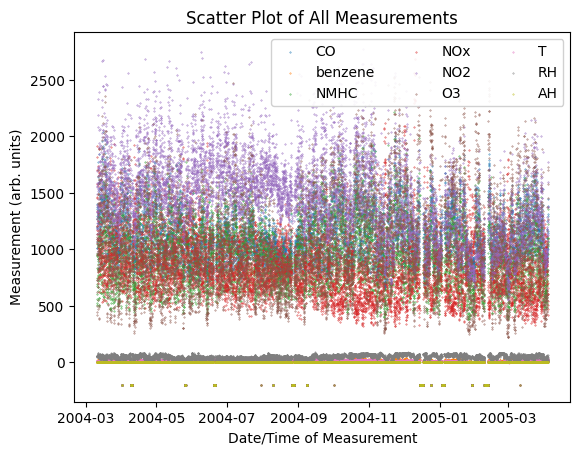

In [15]:
# Plot time-series missing values
df_measurements = df_air_quality.iloc[:,2:-2]   # Subsetted measurement data
for col in df_measurements.columns:             # Iteratively build scatter plot
    plt.scatter(df_air_quality.DateTime, df_air_quality[col],
                s=0.1, label=col)
plt.legend(framealpha=0.9, ncol=3)
plt.title('Scatter Plot of All Measurements')
plt.xlabel('Date/Time of Measurement')
plt.ylabel('Measurement (arb. units)')

There were numerous periods of time when values of -200 were recorded, indicating there wasn't just one big outage. All of the -200 points appear to be the same color, indicating that no measurements were at -200 when the gold (AH) points were not also at -200.

We will check this more explicitly next.  

In [16]:
# Check dates/times when missing values occurred.
df_missing = df_air_quality.loc[df_air_quality.isin([-200]).any(axis=1)]
df_missing.describe()

Date     CO  benzene   NMHC    NOx    NO2     O3      T  \
count                  366  366.0    366.0  366.0  366.0  366.0  366.0  366.0   
mean   2004-10-27 00:00:00 -200.0   -200.0 -200.0 -200.0 -200.0 -200.0 -200.0   
min    2004-04-01 00:00:00 -200.0   -200.0 -200.0 -200.0 -200.0 -200.0 -200.0   
25%    2004-08-26 00:00:00 -200.0   -200.0 -200.0 -200.0 -200.0 -200.0 -200.0   
50%    2004-12-16 00:00:00 -200.0   -200.0 -200.0 -200.0 -200.0 -200.0 -200.0   
75%    2005-01-04 00:00:00 -200.0   -200.0 -200.0 -200.0 -200.0 -200.0 -200.0   
max    2005-03-11 00:00:00 -200.0   -200.0 -200.0 -200.0 -200.0 -200.0 -200.0   
std                    NaN    0.0      0.0    0.0    0.0    0.0    0.0    0.0   

          RH     AH                       DateTime    Time_num  
count  366.0  366.0                            366  366.000000  
mean  -200.0 -200.0  2004-10-27 11:57:52.131147392   11.964481  
min   -200.0 -200.0            2004-04-01 14:00:00    0.000000  
25%   -200.0 -200.0            2004-08-26 13:15:00    6.000000  
50%   -200.0 -200.0            2004-12-16 03:30:00   12.500000  
75%   -200.0 -200.0            2005-01-04 18:45:00   18.000000  
max   -200.0 -200.0            2005-03-11 11:00:00   23.000000  
std      0.0    0.0                            NaN    7.155138

In [17]:
df_missing.DateTime.nunique()

366

Because there are 366 unique DateTime values in the `df_missing` dataframe (generating using a boolean mask to find any rows when any of the values equal -200), we can be confident that all of the measurements were missing at the same times.  

To prevent any impacts to our statistical characterization, we will drop the rows with missing values. These rows will be about 3.91% of the total number of observations, which is acceptable. Imputation is not required or justified.

In [18]:
# Drop rows with missing values
df = df_air_quality.loc[                # Simplified name for convenience
    ~(df_air_quality.isin([-200]).any(axis=1))] # Boolean filter for rows without missing values
df.describe()

Date           CO      benzene         NMHC  \
count                           8991  8991.000000  8991.000000  8991.000000   
mean   2004-09-19 17:30:48.648648704  1099.833166    10.083105   939.153376   
min              2004-03-10 00:00:00   647.000000     0.100000   383.000000   
25%              2004-06-14 00:00:00   937.000000     4.400000   734.500000   
50%              2004-09-20 00:00:00  1063.000000     8.200000   909.000000   
75%              2004-12-26 00:00:00  1231.000000    14.000000  1116.000000   
max              2005-04-04 00:00:00  2040.000000    63.700000  2214.000000   
std                              NaN   217.080037     7.449820   266.831429   

               NOx          NO2           O3            T           RH  \
count  8991.000000  8991.000000  8991.000000  8991.000000  8991.000000   
mean    835.493605  1456.264598  1022.906128    18.317829    49.234201   
min     322.000000   551.000000   221.000000    -1.900000     9.200000   
25%     658.000000  1227.000000   731.500000    11.800000    35.800000   
50%     806.000000  1463.000000   963.000000    17.800000    49.600000   
75%     969.500000  1674.000000  1273.500000    24.400000    62.500000   
max    2683.000000  2775.000000  2523.000000    44.600000    88.700000   
std     256.817320   346.206794   398.484288     8.832116    17.316892   

                AH                       DateTime     Time_num  
count  8991.000000                           8991  8991.000000  
mean      1.025530  2004-09-20 04:59:35.175175296    11.479591  
min       0.184700            2004-03-10 18:00:00     0.000000  
25%       0.736800            2004-06-14 02:30:00     5.000000  
50%       0.995400            2004-09-20 04:00:00    11.000000  
75%       1.313700            2004-12-26 04:30:00    17.000000  
max       2.231000            2005-04-04 14:00:00    23.000000  
std       0.403813                            NaN     6.913320

There are no longer any missing values in the dataset and we have an accurate statistical summary of the measures of center and spread for each column. The upper and lower limits for DateTime, T, and RH seem reasonable. The limits for other columns cannot be quickly assessed for reasonability because the data repository did not describe their units or expected values. We will trust that the data was loaded into the original dataset correctly. The numeric summaries in this table will be assessed later in the Non-Temporal Numeric Summaries section.

Now that data cleaning is complete, we will explore relationships between variables in depth.

---

#### Temporal Plots

Before digging into numerical summaries of benzene concentration in relation to other parameters, it will be helpful to understand the range and variability of each measurement type.

##### Plots: Benzene vs. Weather

Text(0, 0.5, 'Measurement (arb. units)')

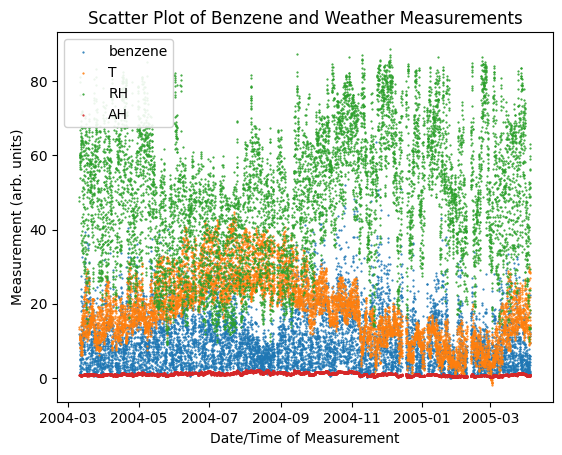

In [19]:
# Plot benzene concentration vs. weather variables
col_list = ['benzene', 'T', 'RH', 'AH']     # Define columns of interest
for col in col_list:                        # Iteratively build scatter plot
    plt.scatter(df.DateTime, df[col],
                s=0.3, label=col)
plt.legend(framealpha=0.9)
plt.title('Scatter Plot of Benzene and Weather Measurements')
plt.xlabel('Date/Time of Measurement')
plt.ylabel('Measurement (arb. units)')

This plot is difficult to decipher due to the density of data points and varying absolute scales.

We will re-plot this on a relative min-max scale and only two variables at a time (benzene and one weather variable).  

In [20]:
# Create MinMax-scaled dataframe
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_minmax = df.copy()                               # Copy entire DataFrame
df_minmax.iloc[:,2:-2] = scaler.fit_transform(
                                df.iloc[:,2:-2])    # Apply transform
df_minmax.head(1)                                   # View columns and first row

/tmp/ipython-input-3514054382.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.51184494 0.46302943 0.54199569 ... 0.35534817 0.25556353 0.30437904]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_minmax.iloc[:,2:-2] = scaler.fit_transform(
/tmp/ipython-input-3514054382.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.36209721 0.3123976  0.3036592  ... 0.37138176 0.31567449 0.36264336]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_minmax.iloc[:,2:-2] = scaler.fit_transform(
/tmp/ipython-input-3514054382.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.31088522 0.36086404 0.34646336 ... 0.11901737 0.16094875 0.14061838]' has dtype incompatible with int64, please expli

Date      Time        CO   benzene      NMHC       NOx      NO2  \
0 2004-03-10  18:00:00  0.511845  0.185535  0.362097  0.310885  0.51304   

         O3         T        RH        AH            DateTime  Time_num  
0  0.454822  0.333333  0.499371  0.280066 2004-03-10 18:00:00        18

In [21]:
df_minmax.describe()

Date           CO      benzene         NMHC  \
count                           8991  8991.000000  8991.000000  8991.000000   
mean   2004-09-19 17:30:48.648648704     0.325078     0.156967     0.303743   
min              2004-03-10 00:00:00     0.000000     0.000000     0.000000   
25%              2004-06-14 00:00:00     0.208184     0.067610     0.191972   
50%              2004-09-20 00:00:00     0.298636     0.127358     0.287275   
75%              2004-12-26 00:00:00     0.419239     0.218553     0.400328   
max              2005-04-04 00:00:00     1.000000     1.000000     1.000000   
std                              NaN     0.155836     0.117136     0.145730   

               NOx          NO2           O3            T           RH  \
count  8991.000000  8991.000000  8991.000000  8991.000000  8991.000000   
mean      0.217490     0.407043     0.348352     0.434792     0.503575   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.142313     0.303957     0.221764     0.294624     0.334591   
50%       0.204998     0.410072     0.322328     0.423656     0.508176   
75%       0.274248     0.504946     0.457211     0.565591     0.670440   
max       1.000000     1.000000     1.000000     1.000000     1.000000   
std       0.108775     0.155669     0.173104     0.189938     0.217823   

                AH                       DateTime     Time_num  
count  8991.000000                           8991  8991.000000  
mean      0.410903  2004-09-20 04:59:35.175175296    11.479591  
min       0.000000            2004-03-10 18:00:00     0.000000  
25%       0.269804            2004-06-14 02:30:00     5.000000  
50%       0.396178            2004-09-20 04:00:00    11.000000  
75%       0.551728            2004-12-26 04:30:00    17.000000  
max       1.000000            2005-04-04 14:00:00    23.000000  
std       0.197338                            NaN     6.913320

We successfully created a new `df_minmax` dataframe with the values of each variable linearly scaled between the minimum value of 0.0 and the maximum value of 1.0. The values in this table will be interpreted later in the Non-Temporal Numeric Summaries section.

Text(0, 0.5, 'Relative Measurement')

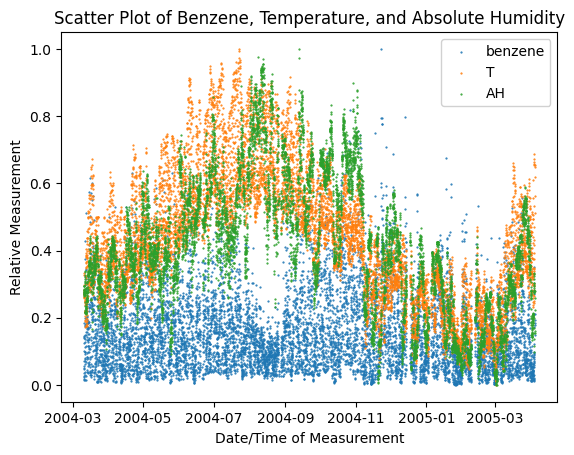

In [22]:
# Pairwise temporal scatterplots with MinMax scaling
# Start with benzene, temperature, and absolute humidity
col_list = ['benzene', 'T', 'AH']                 # Define columns of interest
for col in col_list:                        # Iteratively build scatter plot
    plt.scatter(df_minmax.DateTime, df_minmax[col],
                s=0.3, label=col)
plt.legend(framealpha=0.9)
plt.title('Scatter Plot of Benzene, Temperature, and Absolute Humidity')
plt.xlabel('Date/Time of Measurement')
plt.ylabel('Relative Measurement')


Here, we see obvious seasonality with temperature and absolute humidity but not for benzene. Temperature and absolute humidity were plotted together because they are highly correlated.

It appears that there is a drop in benzene concentration around late August 2004 and an increase in maximum values in the fall of 2004, but the low end is roughly stable throughout the year.

There is not enough correlationt to visually distingusih a consistent correlation between benzene and either of the plotted weather variables.

Text(0, 0.5, 'Relative Measurement')

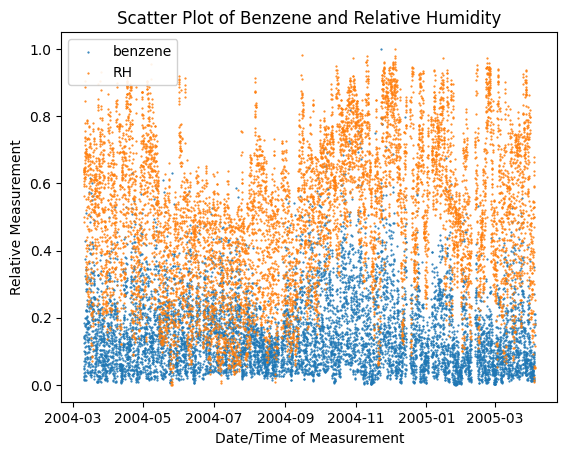

In [23]:
# Repeat with benzene vs. relative humidity
col_list = ['benzene', 'RH']          # Define columns of interest
for col in col_list:                        # Iteratively build scatter plot
    plt.scatter(df_minmax.DateTime, df_minmax[col],
                s=0.3, label=col)
plt.legend(framealpha=0.9)
plt.title('Scatter Plot of Benzene and Relative Humidity')
plt.xlabel('Date/Time of Measurement')
plt.ylabel('Relative Measurement')


There is also no clear correlation between benzene and relative humidity. The largest apparent dip in RH max values (~July 2004) precedes the dip in maximum benzene concentrations by a couple months. No other strong trends are present.

It is possible that there are cyclical trends within a given day between benzene and weather variables. Next, we will plot these measurements against the Time without differentiating days.

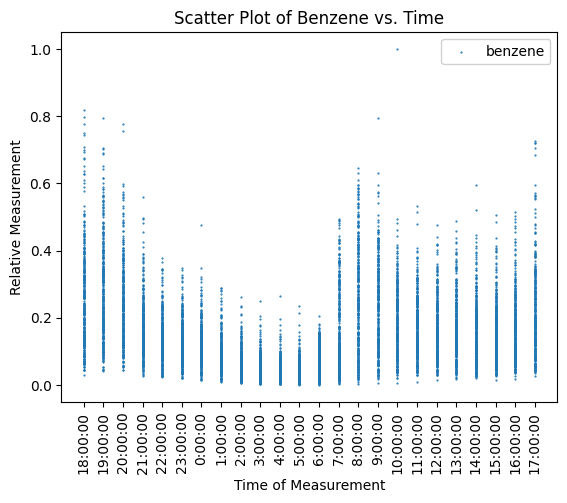

In [24]:
# Pairwise scatterplots by time (ignoring the date)
# Start with benzene
col_list = ['benzene']                 # Define columns of interest
for col in col_list:                        # Iteratively build scatter plot
    plt.scatter(df_minmax.Time, df_minmax[col],
                s=0.3, label=col)
plt.legend(framealpha=0.9)
plt.title('Scatter Plot of Benzene vs. Time')
plt.xlabel('Time of Measurement')
plt.xticks(rotation=90)
plt.ylabel('Relative Measurement')
plt.show()

The plot above shows clear trends in the max benzene concentration based on the time of day. Benzene is least concentrated in the late night and early morning hours, which makes sense because of the corresponding trend in fewer vehicles on the road emitting benzene. In the morning, there is a bump around rush hours (8-9 AM), followed by a small mid-day decrease and a larger increase in the early evening around rush hour (5-7 PM).

Text(0, 0.5, 'Relative Measurement')

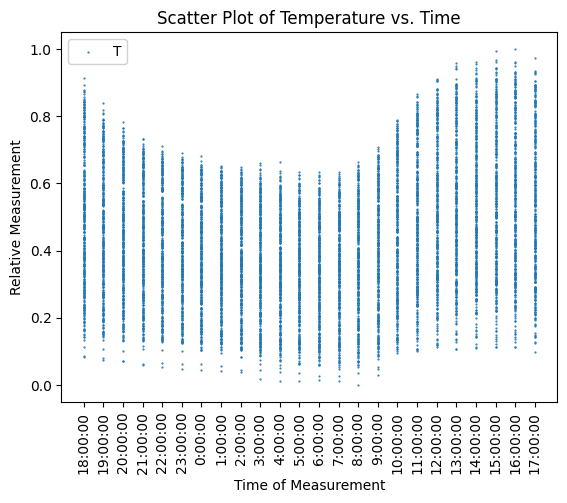

In [25]:
# Next: temperature
col_list = ['T']                            # Define columns of interest
for col in col_list:                        # Iteratively build scatter plot
    plt.scatter(df_minmax.Time, df_minmax[col],
                s=0.3, label=col)
plt.legend(framealpha=0.9)
plt.title('Scatter Plot of Temperature vs. Time')
plt.xlabel('Time of Measurement')
plt.xticks(rotation=90)
plt.ylabel('Relative Measurement')

The temperature trend follows expectations (coldest when the sun is down, warmest during the afternoon). This doesn't follow the same rush-hour trends, decreasing the correlation with benzene concentrations.

Text(0, 0.5, 'Relative Measurement')

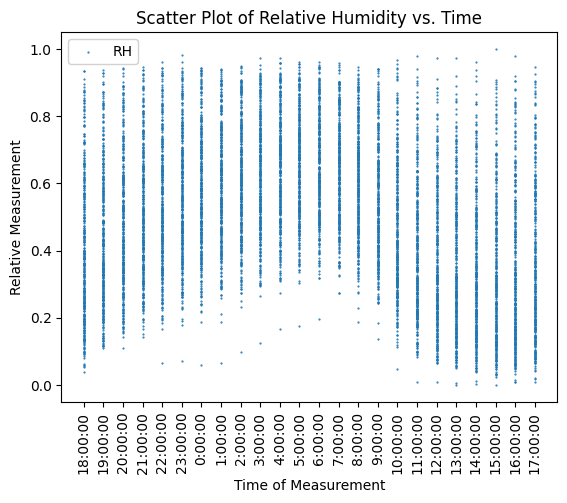

In [26]:
# Next: relative humidity
col_list = ['RH']                            # Define columns of interest
for col in col_list:                        # Iteratively build scatter plot
    plt.scatter(df_minmax.Time, df_minmax[col],
                s=0.3, label=col)
plt.legend(framealpha=0.9)
plt.title('Scatter Plot of Relative Humidity vs. Time')
plt.xlabel('Time of Measurement')
plt.xticks(rotation=90)
plt.ylabel('Relative Measurement')

Interestingly, the maximum relative humidity doesn't appear to depend as much on the time of day, but the minimum relative humidity does. During the night, relative humidity doesn't dip as low because as temperatures decrease, the absolute amount of water vapor retained in the air tends to stay the same, while the air's maximum capacity to contain water vapor decreases, resulting in a higher _relative_ humidity that may ultimately cause dew if the air cannot accommodate enough water vapor. However, this doesn't follow or inversely match benzene trends very well.

Text(0, 0.5, 'Relative Measurement')

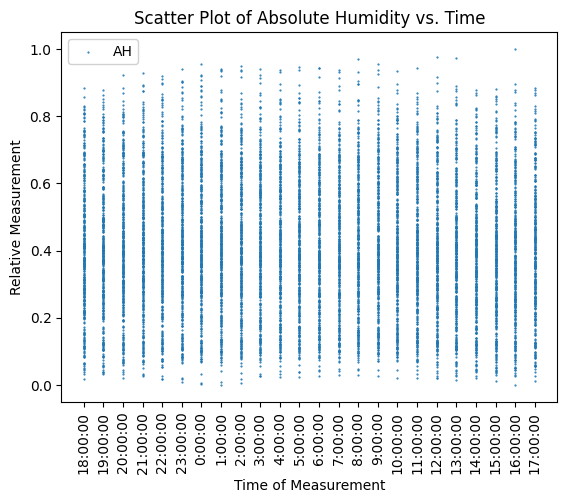

In [27]:
# Finally: absolute humidity
col_list = ['AH']                            # Define columns of interest
for col in col_list:                        # Iteratively build scatter plot
    plt.scatter(df_minmax.Time, df_minmax[col],
                s=0.3, label=col)
plt.legend(framealpha=0.9)
plt.title('Scatter Plot of Absolute Humidity vs. Time')
plt.xlabel('Time of Measurement')
plt.xticks(rotation=90)
plt.ylabel('Relative Measurement')

There are no useful trends in this view of absolute humidity data.

##### Plots: Benzene vs. Multi-Sensor Readings

We will repeat the previous steps with multi-sensor readings instead of weather data to see if there is a more distinguishable trend.

Text(0, 0.5, 'Measurement (arb. units)')

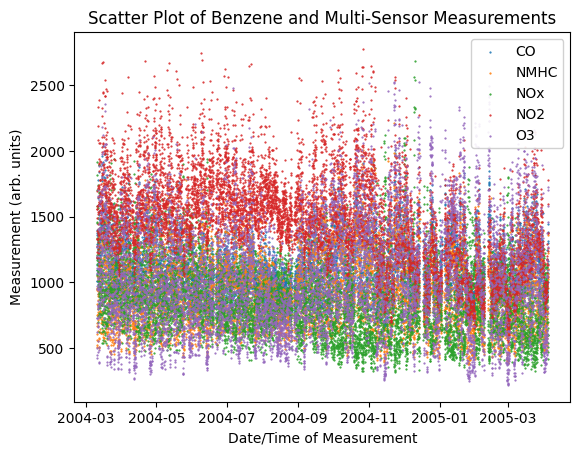

In [28]:
# Plot benzene concentration vs. multi-sensor readings
col_list = ['CO', 'NMHC', 'NOx', 'NO2', 'O3']   # Define columns of interest
for col in col_list:                            # Iteratively build scatter plot
    plt.scatter(df.DateTime, df[col],
                s=0.3, label=col)
plt.legend(framealpha=0.9)
plt.title('Scatter Plot of Benzene and Multi-Sensor Measurements')
plt.xlabel('Date/Time of Measurement')
plt.ylabel('Measurement (arb. units)')

As we saw previously, this combined plot is too difficult to decipher. We will plot fewer analytes together and also perform MinMax scaling to eliminate the absolute value differences.

Text(0, 0.5, 'Relative Measurement')

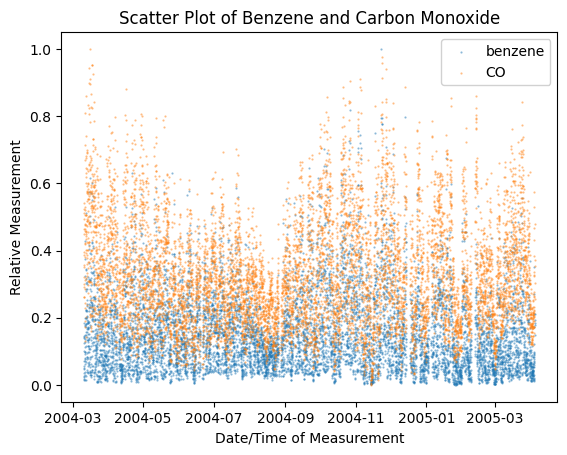

In [29]:
# Pairwise temporal scatterplots with MinMax scaling
# Start with benzene and carbon monoxide
col_list = ['benzene', 'CO']                # Define columns of interest
for col in col_list:                        # Iteratively build scatter plot
    plt.scatter(df_minmax.DateTime, df_minmax[col],
                s=0.3, label=col, alpha=0.5)
plt.legend(framealpha=0.9)
plt.title('Scatter Plot of Benzene and Carbon Monoxide')
plt.xlabel('Date/Time of Measurement')
plt.ylabel('Relative Measurement')

It is still somewhat difficult to see the two variables stacked on top of each other, but we can see a dip in both chemicals around late August 2004, and general consistency in the trends of max values for a given day/week. This potential correlation is more promising than any of the weather data.

To more clearly see the trends, we will make two new dataframes that capture the highest and lowest values for a given column on a given day (still in a relative MinMax scale). We can then visualize how the highest readings and lowest readings for each chemical correspond.

In [30]:
# Define new DataFrames for Min and Max values on each day
df_minmax_dailymax = df_minmax.groupby(df_minmax['DateTime'].dt.date).agg('max')
print('daily max shape: ', df_minmax_dailymax.shape)
df_minmax_dailymin = df_minmax.groupby(df_minmax['DateTime'].dt.date).agg('min')
print('daily min shape: ', df_minmax_dailymin.shape)

daily max shape:  (383, 13)
daily min shape:  (383, 13)


The `df_minmax_dailymax` and `df_minmax_dailymin` DataFrames have been created and subsetted down to one sample per day. Next, we will plot these on top of the previous scatterplot to verify effectiveness of aggregation function.

Text(0, 0.5, 'Relative Measurement')

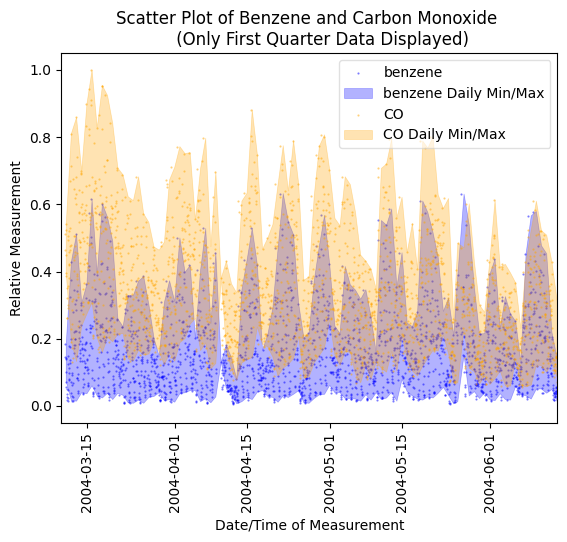

In [31]:
# Verify df_minmax_dailymax and df_minmax_dailymin for benzene and CO
col_list = ['benzene', 'CO']                    # Define columns of interest
color_list = ['blue', 'orange']                 # Ensure consistent colors
for col, color in zip(col_list, color_list):    # Iteratively build scatter plot
    plt.scatter(df_minmax.DateTime, df_minmax[col],
                s=0.3, c=color, label=col, alpha=0.5)   # Plot scatter
    plt.fill_between(df_minmax_dailymax.DateTime,
                     df_minmax_dailymin[col], df_minmax_dailymax[col],
                     linewidth=0.5, color=color, alpha = 0.3,
                     label=(col + ' Daily Min/Max'))        # Plot lines/fill
plt.legend(framealpha=0.6)
plt.title('Scatter Plot of Benzene and Carbon Monoxide \n \
    (Only First Quarter Data Displayed)')
plt.xlabel('Date/Time of Measurement')
plt.xticks(rotation=90)
plt.xlim(pd.to_datetime('2004-03-10'), pd.to_datetime('2004-06-14'))    # First 25%
plt.ylabel('Relative Measurement')

The plot above (limited in duration to let us zoom in to see a sample of fine-detail behavior) shows that the min daily and max daily dataframes are generally accurate. Although there are a few plots beyond the outer edges of the bands, we can likely attribute these to the fact that the min daily and max daily functions are plotted as single points in time instead of horizontal bands covering the entire day of the respecive value.

This new style of plot helps us more clearly see how the variations in one column correspond to variations of another chemical. For example, we can clearly see that whenever there is a spike/depression in benzene concentration, there is typically also a spike in CO concentration, even if the trend is more or less pronounced. This behavior is a positive indication that measurements from a simple multi-sensor can be correlated with benzene concentrations.

Text(0, 0.5, 'Relative Measurement')

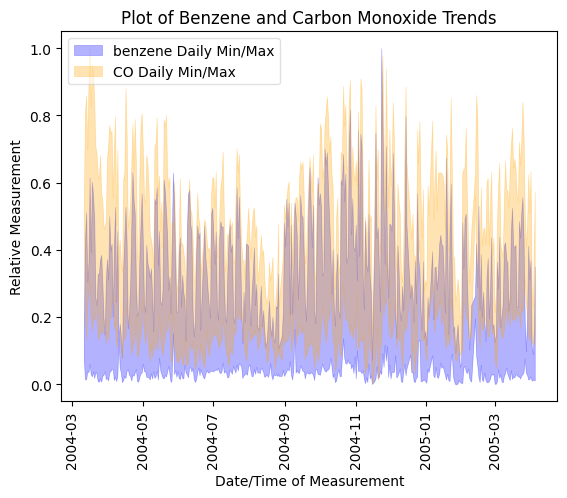

In [32]:
# Repeat the previous plot for the full period, without scatter points
col_list = ['benzene', 'CO']                    # Define columns of interest
color_list = ['blue', 'orange']                 # Ensure consistent colors
for col, color in zip(col_list, color_list):    # Iteratively build plot
    plt.fill_between(df_minmax_dailymax.DateTime,
                     df_minmax_dailymin[col], df_minmax_dailymax[col],
                     linewidth=0.5, color=color, alpha = 0.3,
                     label=(col + ' Daily Min/Max'))        # Plot lines/fill
plt.legend(framealpha=0.6)
plt.title('Plot of Benzene and Carbon Monoxide Trends')
plt.xlabel('Date/Time of Measurement')
plt.xticks(rotation=90)
plt.ylabel('Relative Measurement')

The full-period plot again confirms that daily max and daily min CO levels strongly trend with daily max and daily min benzene levels.

Next, we will investigate these trends with the other multi-sensor measurements, using smaller periods (quarters of the full experiment time) to be able to focus on trend features without excessive compression.

In [33]:
from pandas._libs.lib import is_integer
# Define function to reduce coding redundancy now that we have a useful plot
def plot_relative_dailyminmax(variable_1: object,
                              variable_2: object = 'benzene',
                              color_1: object = 'orange',
                              quarter: int = 2):
    '''
    This function takes one or two arguments for variables (chemical analytes)
    (second variable assumed to be benzene if not otherwise specified),
    one optional color argument, and one optional time period argument
    (quarter 1, 2, 3, or 4). It creates a plot showing the daily min/max values
    for the specified variables for comparison/trending analysis.
    For consistency, benzene is always shown as blue.
    '''
    try:                            # Basic error checking for variable names
        df_minmax[variable_1]
        df_minmax[variable_2]
    except KeyError:
        print('Invalid variable name(s) - try again!')
        return None

    acceptable_quarters = [1, 2, 3, 4]      # Error checking for "quarter" arg
    if quarter not in acceptable_quarters:
        print('Invalid quarter. Specify 1, 2, 3, or 4.')
        return None

    quarter_bounds = [x for x in df_minmax.DateTime.quantile(
        q=[0.0, 0.25, 0.5, 0.75, 1.0])]             # Used to determine xlim

    color_list = ['blue', color_1]                  # Defines color scheme
    col_list = [variable_2, variable_1]             # Packages variables in list
    for col, color in zip(col_list, color_list):
        plt.fill_between(df_minmax_dailymax.DateTime,
                        df_minmax_dailymin[col], df_minmax_dailymax[col],
                        linewidth=0.5, color=color, alpha = 0.3,
                        label=(col + ' Daily Min/Max'))     # Plot lines/fill
    plt.legend(framealpha=0.6)
    plt.title(str('Plot of ' + variable_2 + ' and ' + variable_1 + ' Daily Trends'))
    plt.xlabel('Date/Time of Measurement')
    plt.xticks(rotation=90)
    plt.ylabel('Relative Measurement')
    plt.xlim(quarter_bounds[quarter-1], quarter_bounds[quarter])
    plt.show()

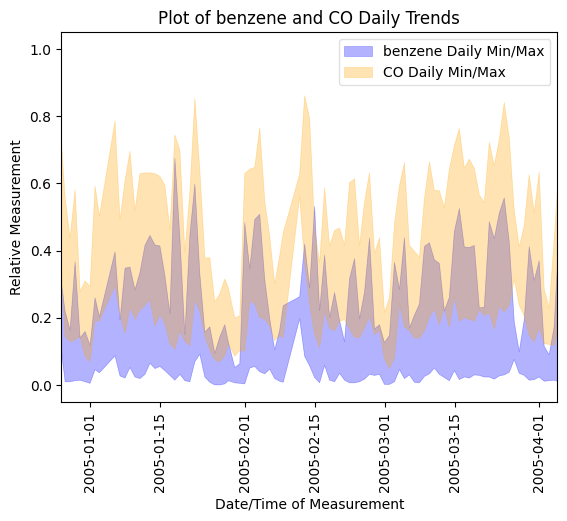

In [34]:
# CO and benzene
plot_relative_dailyminmax('CO', quarter=4)

This plot demonstrates that the plotting function works as expected. After iterating through the quarters, we can see that quarter 4 has the most variability in terms of the maximum _and_ minimum daily benzene concentration. We will use this quarter for comparison with the other variables, too, so we can maximize the visual correlation potential.  

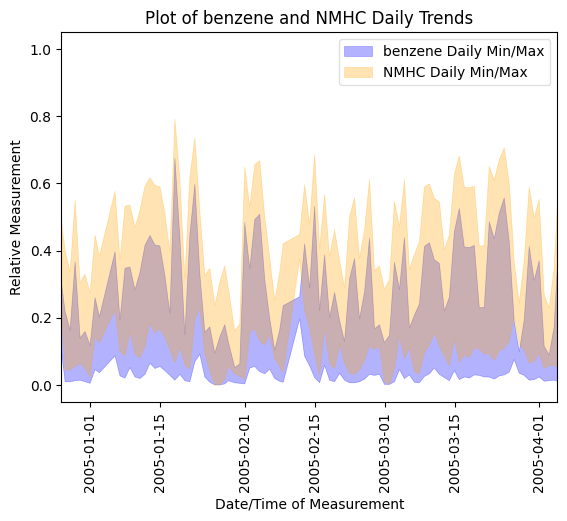

In [35]:
# NMHC and benzene
plot_relative_dailyminmax('NMHC', quarter=4)

NMHC is also strongly correlated with benzene concentrations, on both the min and max daily values. Peaks and troughs align, indicating that NMHC will be valuable for estimating benzene trends indirectly.

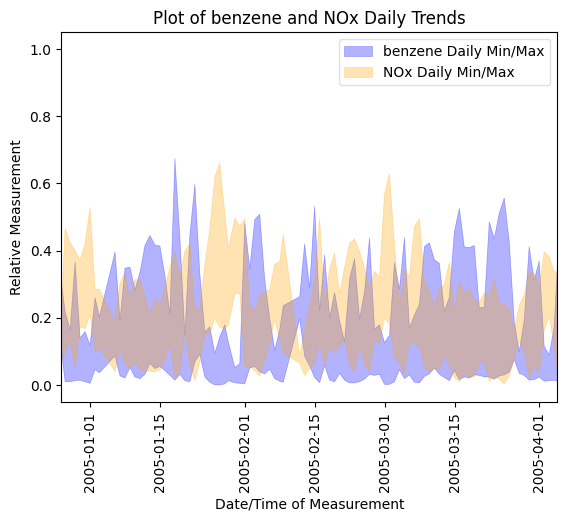

In [36]:
# NOx and benzene
plot_relative_dailyminmax('NOx', quarter=4)

NOx is far less correlated with benzene concentrations. Features (peaks and troughs for the min and max daily values) do not systematically align. NOx is not likely useful for predicting benzene levels.

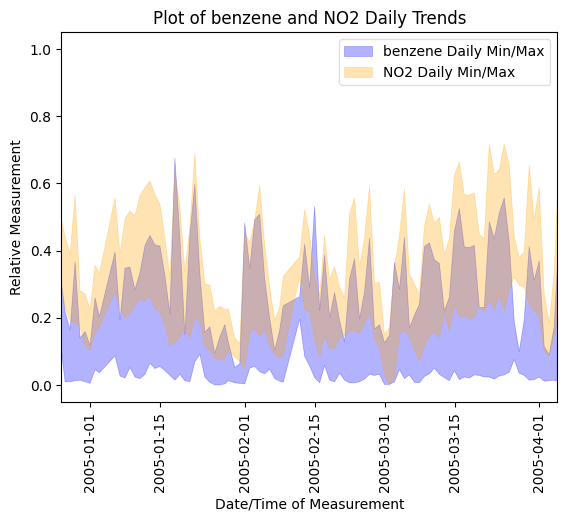

In [37]:
# NO2 and benzene
plot_relative_dailyminmax('NO2', quarter=4)

Unexpectedly, NO2 has a strong correlation with benzene levels even though NOx did not (note that NO2 is a component of NOx, which means that the other components were uncorrelated enough to obscure the strong correlation from the NO2).

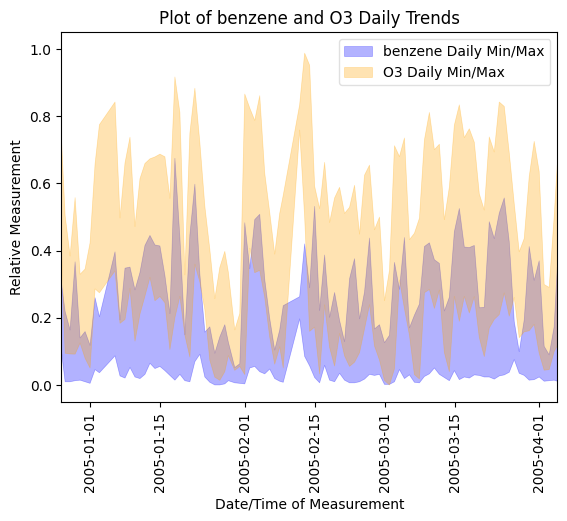

In [38]:
# O3 and benzene
plot_relative_dailyminmax('O3', quarter=4)

O3 is strongly correlated with benzene levels. This means that all of the multi-sensor readings except for NOx are likely useful in predicting benzene trends.

Now that we can more cleanly visualize correlations between two time-series variables, we will re-visit the weather measurements to determine if any trends are more apparent.

##### Revisited: Benzene vs. Weather

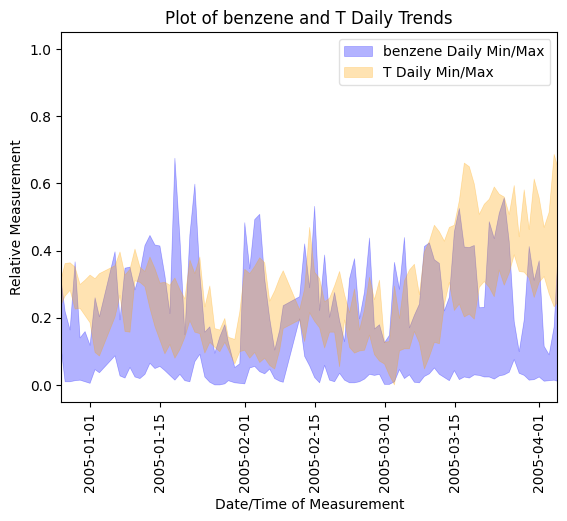

In [39]:
# Temperature and benzene
plot_relative_dailyminmax('T', quarter=4)

No strong correlation is visible.

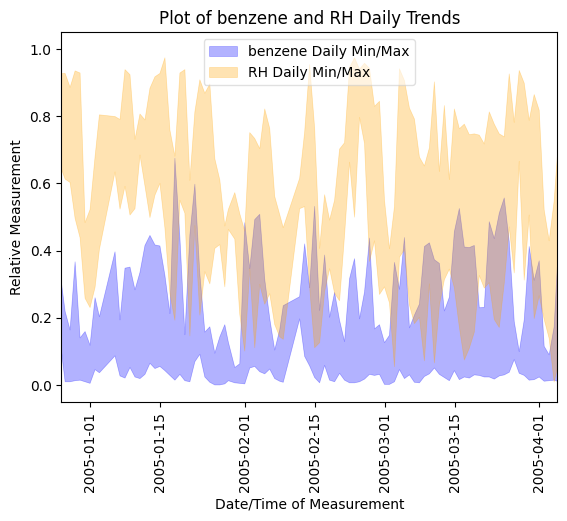

In [40]:
# Relative humidity and benzene
plot_relative_dailyminmax('RH', quarter=4)

There may be a weak correlation between the max daily relative humidity and the max daily benzene concentration. There does not appear to be correlation with the daily minimum values.

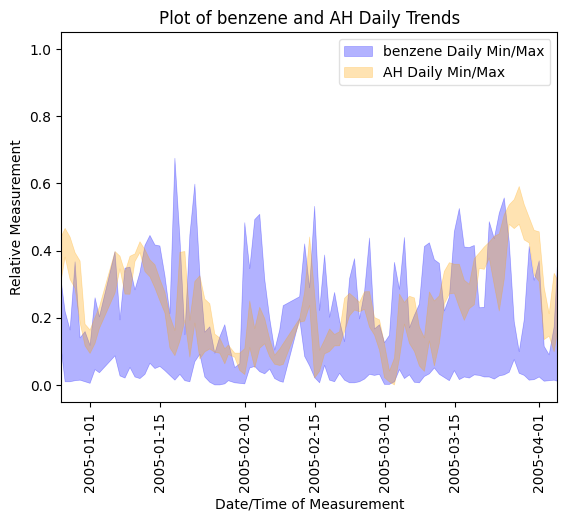

In [41]:
# Absolute humidity and benzene
plot_relative_dailyminmax('AH', quarter=4)

If there is a correlation between the max daily values, it is weak. Any correlation in the min daily values is not apparent.

Lastly, we will examine the hourly univariate distributions for multi-sensor measurements for comparison with the benzene trends seen above (in the "Plots: Benzene vs. Weather" section).

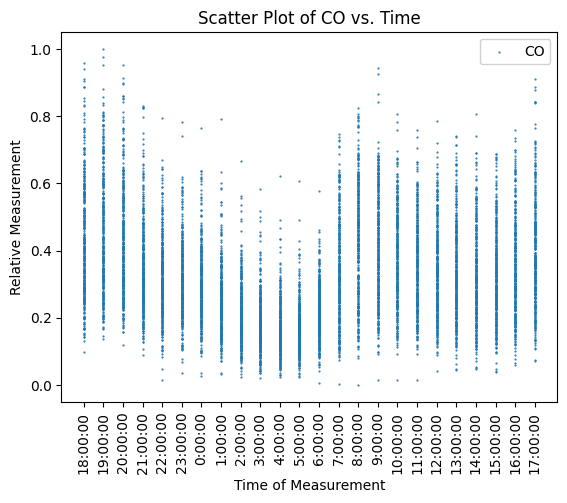

In [42]:
# Pairwise scatterplots by time (ignoring the date)
# Start with CO
col_list = ['CO']                           # Define columns of interest
for col in col_list:                        # Iteratively build scatter plot
    plt.scatter(df_minmax.Time, df_minmax[col],
                s=0.3, label=col)
plt.legend(framealpha=0.9)
plt.title('Scatter Plot of CO vs. Time')
plt.xlabel('Time of Measurement')
plt.xticks(rotation=90)
plt.ylabel('Relative Measurement')
plt.show()

The hourly CO plot follows the trend of benzene: when vehicle traffic is higher, the concentration goes up. At night time, the concentration steadily decreases. Again, this trend is prominent for the max values shown, but it is less clear if the same temporal trend happens for all days due to the spread of the data within each hour window.

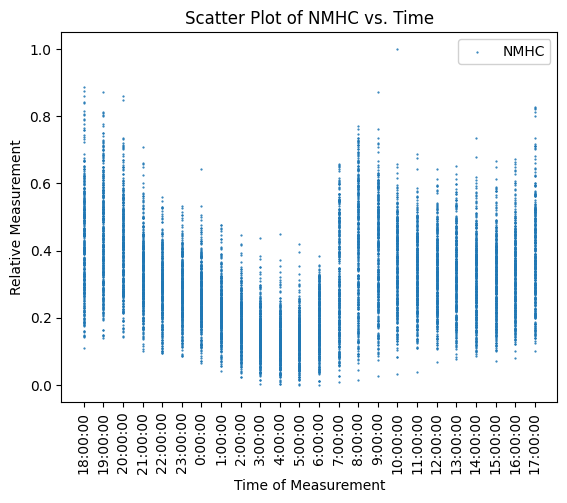

In [54]:
# Next: NMHC
col_list = ['NMHC']                         # Define columns of interest
for col in col_list:                        # Iteratively build scatter plot
    plt.scatter(df_minmax.Time, df_minmax[col],
                s=0.3, label=col)
plt.legend(framealpha=0.9)
plt.title('Scatter Plot of NMHC vs. Time')
plt.xlabel('Time of Measurement')
plt.xticks(rotation=90)
plt.ylabel('Relative Measurement')
plt.show()

NMHC follows the same trend as benzene and CO, but with fewer outliers than CO has.

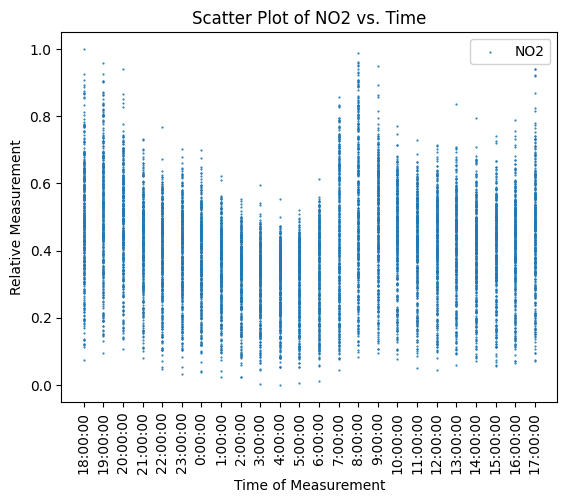

In [55]:
# Next: NO2
col_list = ['NO2']                          # Define columns of interest
for col in col_list:                        # Iteratively build scatter plot
    plt.scatter(df_minmax.Time, df_minmax[col],
                s=0.3, label=col)
plt.legend(framealpha=0.9)
plt.title('Scatter Plot of NO2 vs. Time')
plt.xlabel('Time of Measurement')
plt.xticks(rotation=90)
plt.ylabel('Relative Measurement')
plt.show()

NO2 closely follows the hourly trend of benzene and NMHC, with a similar number of outliers.

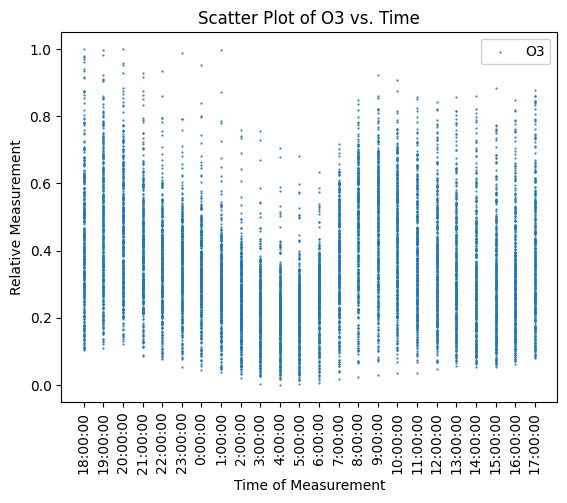

In [56]:
# Next: O3
col_list = ['O3']                           # Define columns of interest
for col in col_list:                        # Iteratively build scatter plot
    plt.scatter(df_minmax.Time, df_minmax[col],
                s=0.3, label=col)
plt.legend(framealpha=0.9)
plt.title('Scatter Plot of O3 vs. Time')
plt.xlabel('Time of Measurement')
plt.xticks(rotation=90)
plt.ylabel('Relative Measurement')
plt.show()

O3 follows the same trend as the other pollutants above, but with more outliers.

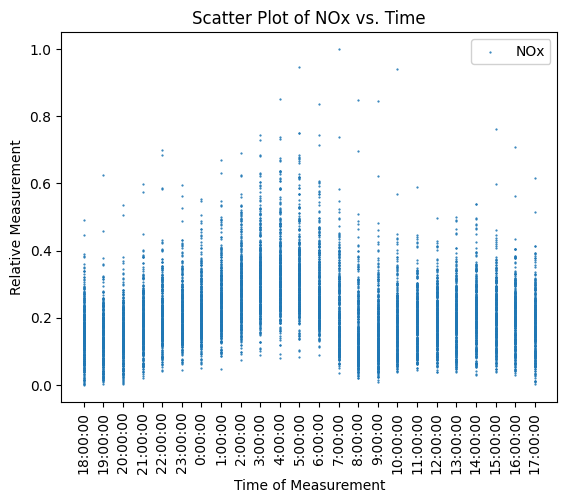

In [57]:
# Next: NOx
col_list = ['NOx']                 # Define columns of interest
for col in col_list:                        # Iteratively build scatter plot
    plt.scatter(df_minmax.Time, df_minmax[col],
                s=0.3, label=col)
plt.legend(framealpha=0.9)
plt.title('Scatter Plot of NOx vs. Time')
plt.xlabel('Time of Measurement')
plt.xticks(rotation=90)
plt.ylabel('Relative Measurement')
plt.show()

NOx follows an _inverse_ trend to the other pollutants. Because the feature shape near heavy traffic hours is less prominent, NOx likely has an indirect feedback effect with vehicle traffic. Specifically, it is likely that vehicle emissions cause a decrease in atmospheric NOx, but it takes time for that reaction to occur. That is why the changes are more gradual and inversely related to direct vehicle emissions.


---


#### Non-Temporal Plots

##### Plots: Univariate and Bivariate Distributions

The pairwise correlations between numeric variables can easily be visualized using the Seaborn `pairplot()` function. With this single line of code, we can visualize the univariate and bivariate distributions for several numeric variable at once.

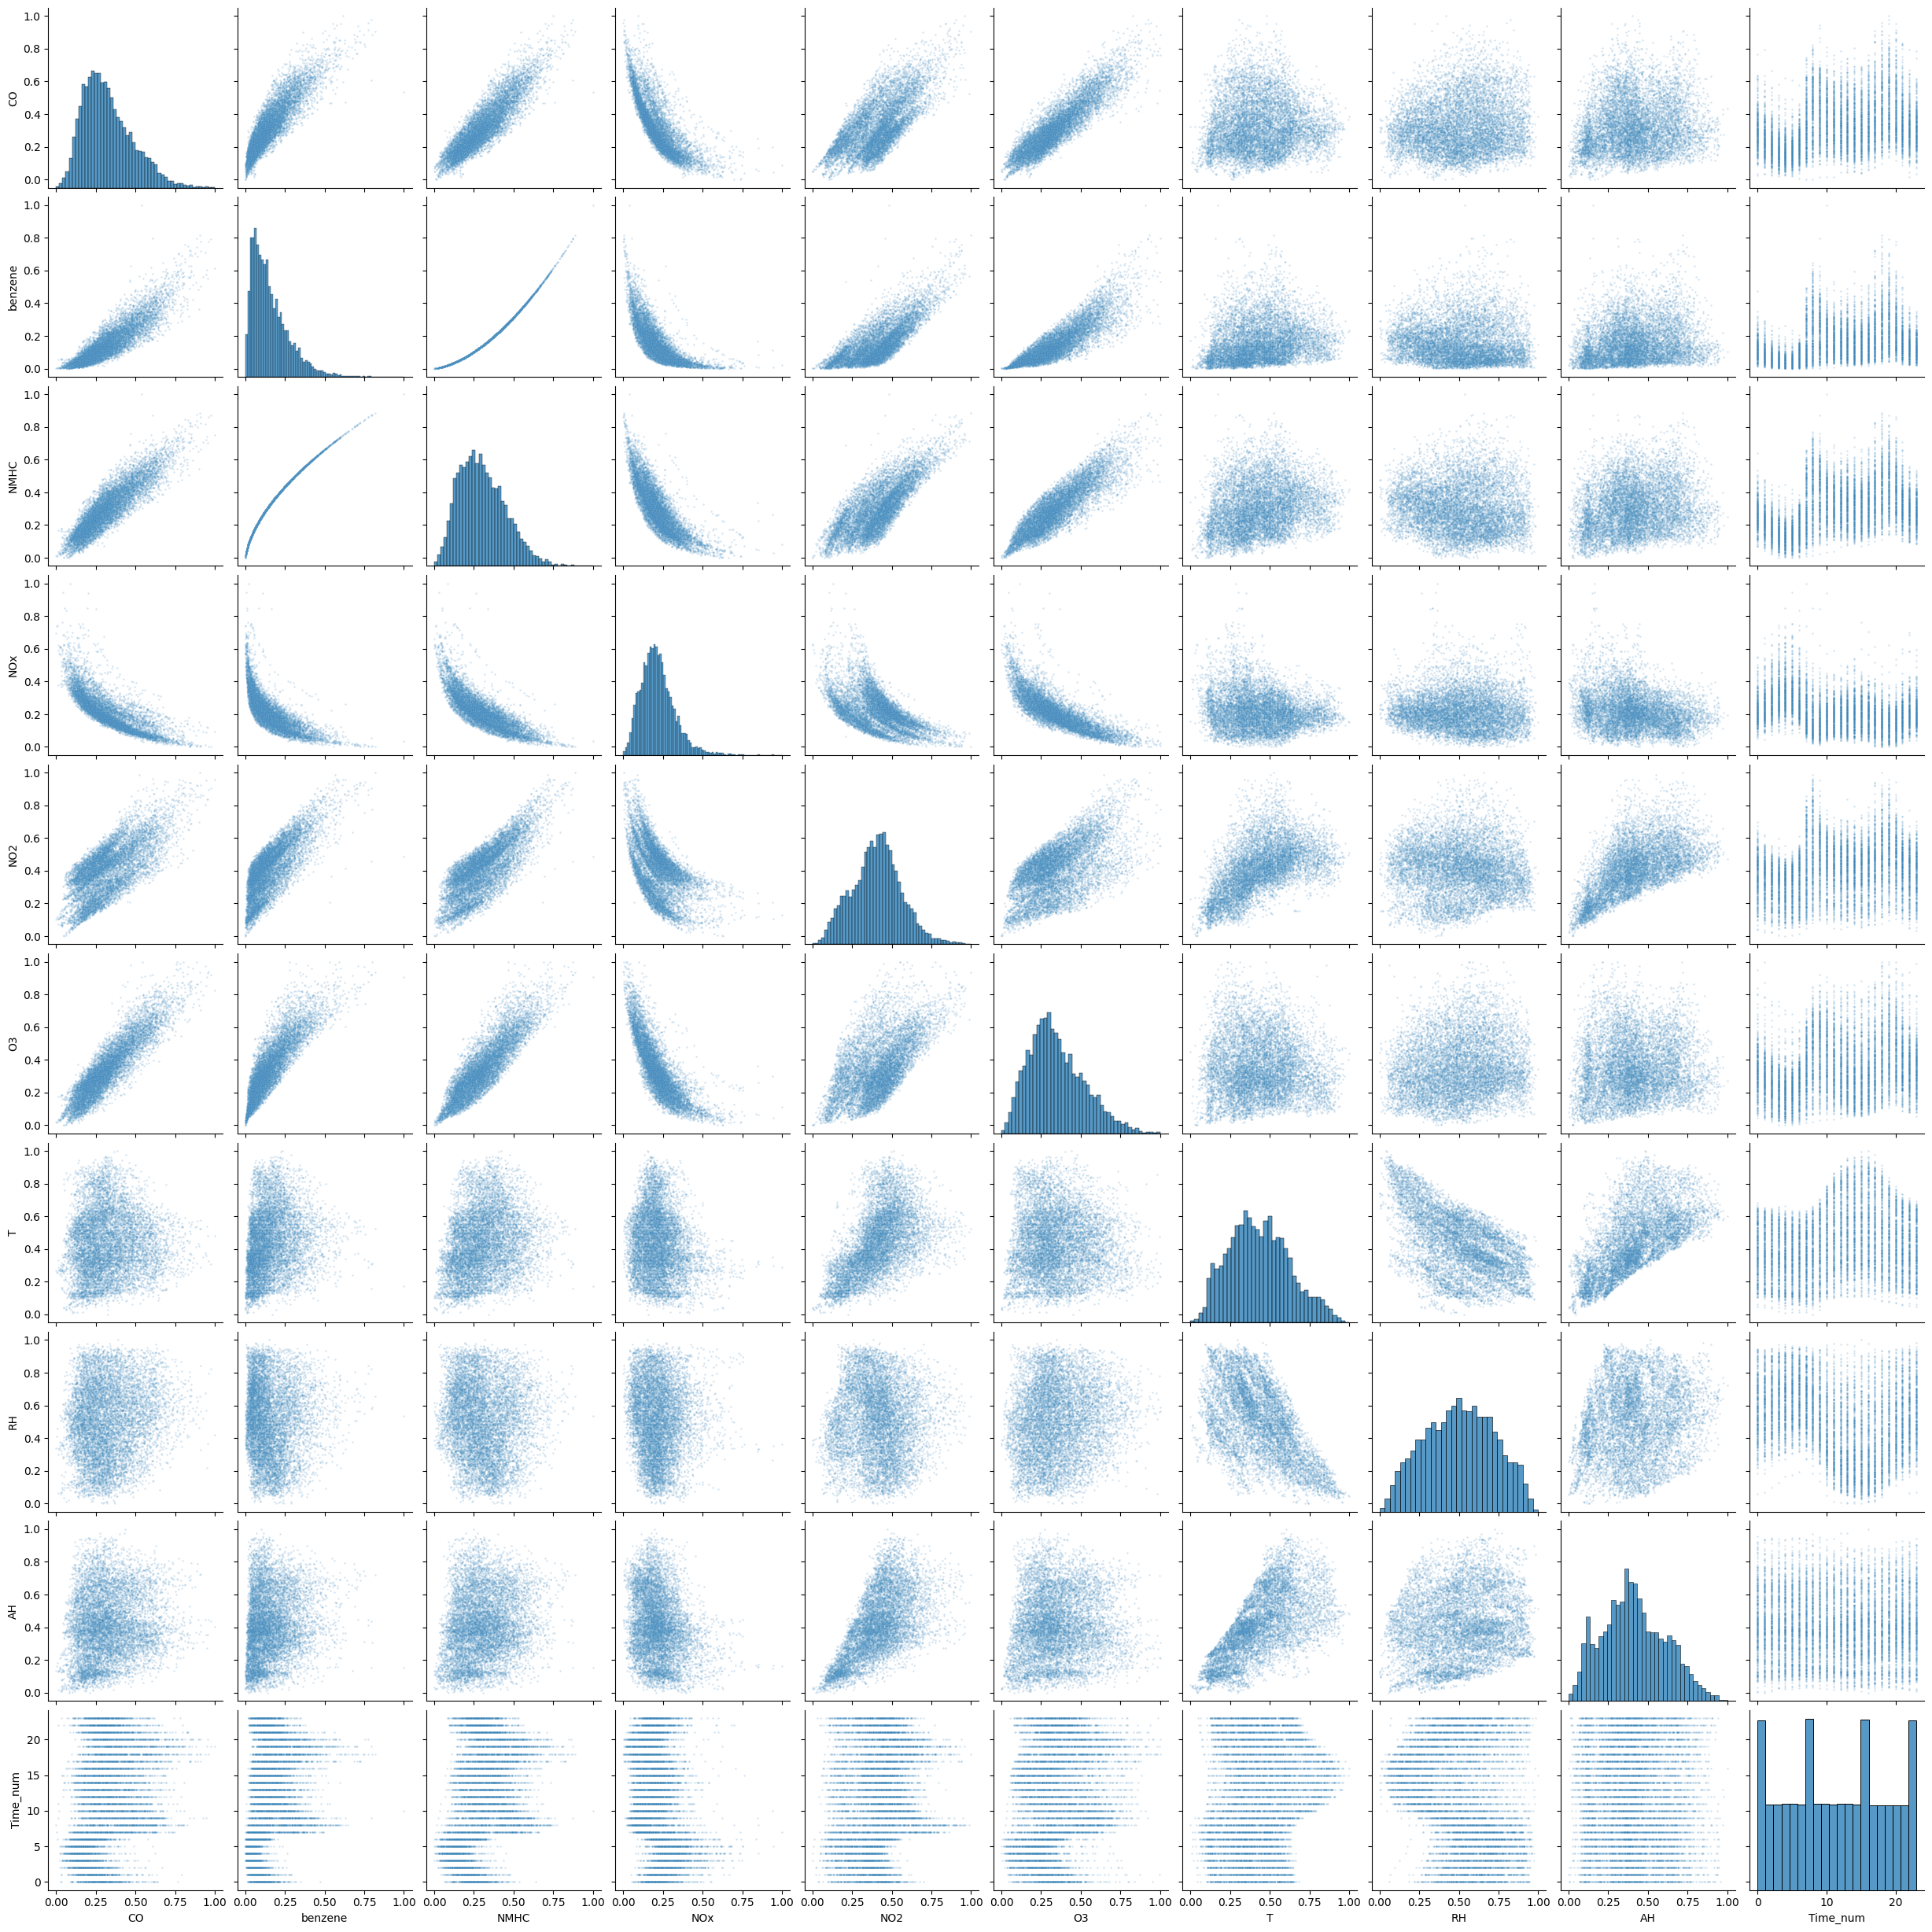

In [43]:
sns.pairplot(df_minmax, plot_kws={'alpha': 0.2, "s": 3})

This plot offers a wealth of information to interpret.

+ The **histograms** show univariate distributions. Benzene concentrations are non-gaussian and has significant right-tail skewing. No other variable matches this distribution shape; CO and O3 are somewhat close, and RH is the least similar.
+ The **scatter plots** show bivariate distributions. Plots like AH vs. RH show very little correlation (ironically) and plots like NMHC vs. benzene show a very strong correlation. While there are many interesting patterns to analyze, we will focus on correlations with benzene based on the application discussed in the paper (and as required by the task instructions).
    - There is little correlation between benzene and AH, RH, and T.
    - There is moderate positive correlation between benezene and CO, NO2, and O3. These variables may be used to estimate benzene levels with some appreciable level of inaccuracy.
    - There is moderate negative correlation between benzene and NOx. The inverse and nonlinear relationship with NOx may explain the lack of obvious visual correlation in the time-series plots analyzed earlier.
    - There is a very strong, positive correlation between benzene and NMHC. Although it is non-linear, the tight grouping of scatter points shows that a calibration relationship can be characterized and implemented with a high degree of precision and accuracy.   


---


#### Non-Temporal Numeric Summaries

Note that the numeric summaries in this section may be displayed using a heatmap. This is done for convenience of picking out trends in the data. However, it is still appropriate to include these analyses in the "Numeric Summaries" section instead of the "Plot" sections because the heatmaps only highlight the magnitude of the numeric values.

##### Correlation Matrix

Now that we have visually explored univariate and bivariate relationships, we will explore the quantitative numerical correlations.

Text(0.5, 1.0, 'Correlation Heat Map')

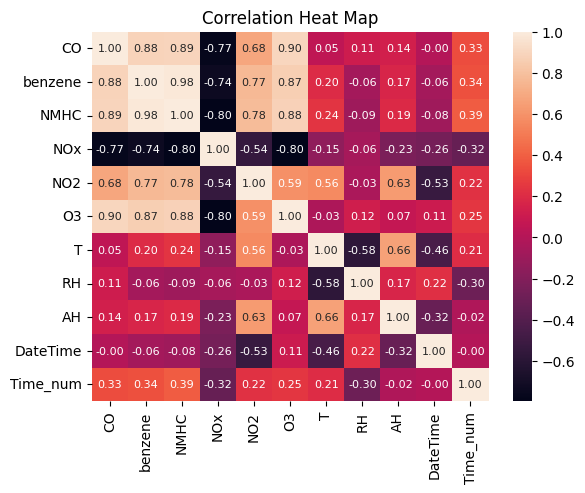

In [44]:
# Generate correlation matrix for numeric variables
corr = df_minmax.iloc[:, 2:].corr()

# Plot correlation matrix as heat map using Seaborn
sns.heatmap(corr, annot=True, fmt=".2f", annot_kws={"size": 8})
plt.title('Correlation Heat Map')

Similar to the Pair Plots above, this Correlation Matrix viewed as a heatmap offers a wealth of information.
+ Values near 0 show no significant correlation between the variables. Values near +1 show a very strong positive linear relationship, while values near -1 show a very strong negative linear relationship (which can still be useful).
+ In relation to benzene, the correlation is strongest with NMHC () (as previously demonstrated graphically). There is also an appreciable positive correlation with CO, NO2, and O3. These quantiative correlation values help us better understand the relative strength of the correlations when it was difficult to determine graphically. Further, we see that the negative correlation with NOx is nearly as strong as the positive correlation with NO2.
+ There is likely no useful bivariate correlation between benzene and the weather variables or Date/Time variables.  

##### Covariance Matrix

To better understand the influence of measurement magnitude on the variable relationships, we will repeat the previous step with a covariance matrix and the un-scaled dataset (before MinMax standardization).

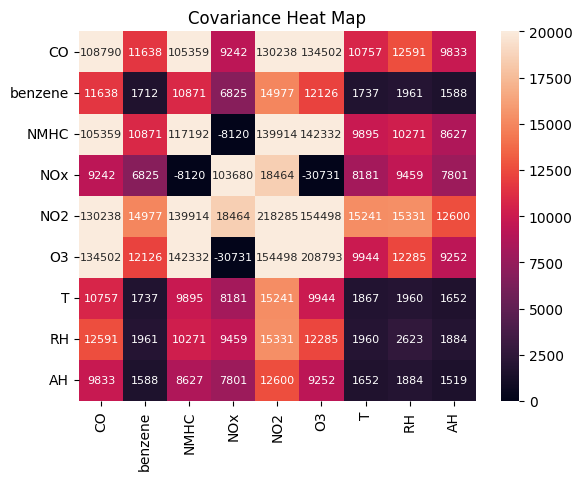

In [45]:
# Generate covariance matrix for numeric variables
cov = df_air_quality.iloc[:, 2:-2].cov()
# Plot correlation matrix as heat map using Seaborn
sns.heatmap(cov, annot=True, fmt=".0f", annot_kws={"size": 8},
            vmin=0, vmax=2E4)
plt.title('Covariance Heat Map')
plt.show()

Interstingly, benzene's covariance trends do not completely match the correlation trends. For example, NO2 has a higher covariance with benzene than NMHC does, even though NMHC has a far superior correlation value (0.98 vs. 0.77). This is likely because NO2 has more variability in its range. Still, because these variable relationships will be used to estimate benzene concentrations, the magnitude of variability might not matter as long as the sensor has sufficient dynamic range and precision. Therefore, the correlation matrix results should carry more weight because calibration parameters can compensate for differing measurement ranges.

##### Univariate Numeric Summaries

The table below will show basic measures of center and spread for the un-scaled dataset after cleaning.

In [46]:
df.describe().round(3)

Date        CO   benzene      NMHC       NOx  \
count                           8991  8991.000  8991.000  8991.000  8991.000   
mean   2004-09-19 17:30:48.648648704  1099.833    10.083   939.153   835.494   
min              2004-03-10 00:00:00   647.000     0.100   383.000   322.000   
25%              2004-06-14 00:00:00   937.000     4.400   734.500   658.000   
50%              2004-09-20 00:00:00  1063.000     8.200   909.000   806.000   
75%              2004-12-26 00:00:00  1231.000    14.000  1116.000   969.500   
max              2005-04-04 00:00:00  2040.000    63.700  2214.000  2683.000   
std                              NaN   217.080     7.450   266.831   256.817   

            NO2        O3         T        RH        AH  \
count  8991.000  8991.000  8991.000  8991.000  8991.000   
mean   1456.265  1022.906    18.318    49.234     1.026   
min     551.000   221.000    -1.900     9.200     0.185   
25%    1227.000   731.500    11.800    35.800     0.737   
50%    1463.000   963.000    17.800    49.600     0.995   
75%    1674.000  1273.500    24.400    62.500     1.314   
max    2775.000  2523.000    44.600    88.700     2.231   
std     346.207   398.484     8.832    17.317     0.404   

                            DateTime  Time_num  
count                           8991  8991.000  
mean   2004-09-20 04:59:35.175175296    11.480  
min              2004-03-10 18:00:00     0.000  
25%              2004-06-14 02:30:00     5.000  
50%              2004-09-20 04:00:00    11.000  
75%              2004-12-26 04:30:00    17.000  
max              2005-04-04 14:00:00    23.000  
std                              NaN     6.913

+ Date and DateTime: The dates fall uniformly within the expected range (March 2004 to April 2005). The hours in Time_num also follow the expected distribution (quartiles evenly spaced from the min (0 = midnight) to the max (23 = 11 PM).
+ Min values: Only temperature goes below zero, which makes sense because none of the other quantities should be capable of doing so.
+ Standard deviation: In general, the values with a lower maximum have a lower standard deviation. Each standard deviations is on the order of roughly 10-20% of the max value. This indicates that no small magnitude quantities vary wildly and no large magnitude quantities are extremely stable. This is helpful for potentially inferring one variable from another because too low or too high of a surrogate measurement standard deviation will make it hard to reliably correlate the measurement with a different parameter. Too big or too small of swings are each disadvantageous.
+ Mean vs. median: Benzene has the biggest relative difference between the mean and median, showing that its distribution is the least symetrical and has significant tailing, significant outliers, or both. We saw earlier in the pair plots/histograms that benzene's distribution was very non-normal, which supports this claim.
+ Quartile values: Most parameters have fairly uniform spacing between adjacent quartiles. Benzene has the most significant difference between the 75% quartile and max value, further reinforcing the observed behavior discussed in the previous bullet (mean vs. median).

We will now repeat this with the MinMax-scaled dataframe.

In [47]:
df_minmax.describe().round(3)

Date        CO   benzene      NMHC       NOx  \
count                           8991  8991.000  8991.000  8991.000  8991.000   
mean   2004-09-19 17:30:48.648648704     0.325     0.157     0.304     0.217   
min              2004-03-10 00:00:00     0.000     0.000     0.000     0.000   
25%              2004-06-14 00:00:00     0.208     0.068     0.192     0.142   
50%              2004-09-20 00:00:00     0.299     0.127     0.287     0.205   
75%              2004-12-26 00:00:00     0.419     0.219     0.400     0.274   
max              2005-04-04 00:00:00     1.000     1.000     1.000     1.000   
std                              NaN     0.156     0.117     0.146     0.109   

            NO2        O3         T        RH        AH  \
count  8991.000  8991.000  8991.000  8991.000  8991.000   
mean      0.407     0.348     0.435     0.504     0.411   
min       0.000     0.000     0.000     0.000     0.000   
25%       0.304     0.222     0.295     0.335     0.270   
50%       0.410     0.322     0.424     0.508     0.396   
75%       0.505     0.457     0.566     0.670     0.552   
max       1.000     1.000     1.000     1.000     1.000   
std       0.156     0.173     0.190     0.218     0.197   

                            DateTime  Time_num  
count                           8991  8991.000  
mean   2004-09-20 04:59:35.175175296    11.480  
min              2004-03-10 18:00:00     0.000  
25%              2004-06-14 02:30:00     5.000  
50%              2004-09-20 04:00:00    11.000  
75%              2004-12-26 04:30:00    17.000  
max              2005-04-04 14:00:00    23.000  
std                              NaN     6.913

The table above is less useful than the statistics for the unscaled dataset, in some respects. For example, every min value is 0 and every max value is 1. However, we can more clearly see across different columns how the shape of the data varies. For example, the "50%" quartile row shows that the median for some variables are well-centered between the min and the max (e.g., RH=0.508), while others are very skewed to the low end (e.g., benzene=0.127).

A comparison of the mean vs. the min and max values (0 and 1) shows that there is a lot of skew or a few very significant outliers affecting the relative shape of the data. A comparison of the mean vs. the median shows the same. The greater the difference between these values, the more the overall feature is affected by outliers. This is more evident with benzene and CO than with NO2 and RH.

We can also see how the relative standard deviation compares between variables (largely independent of the magnitude of measurements). NOx values appear to vary less than O3 values, as an example.

---

#### Temporal Numeric Summaries

To better investigate the time-dependent nature of measurement variation, we will use the date and time variables to create pseudo-categories so we can contrast groupings of measurements based on time of day, day of the week, and month of the year. In this investigation, we will use the MinMax-scaled dataset to remove the differing measurement magnitudes from the analysis, simplifying interpretation.

##### By Month

Text(0.5, 1.0, 'Heatmap of Monthly Measurement Average Values')

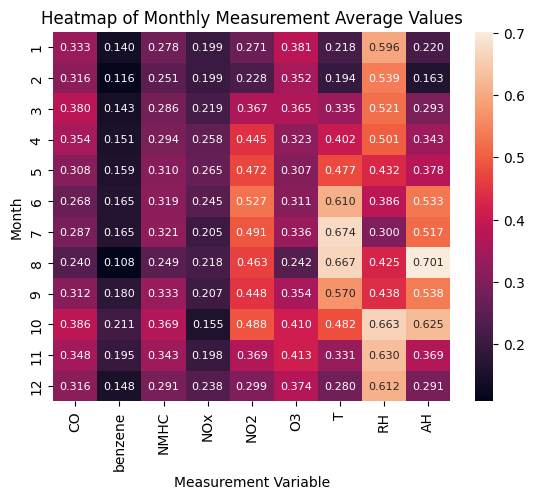

In [48]:
# Create heatmap for monthly mean values
df_minmax_month = df_minmax.iloc[:,2:-2].groupby(df_minmax.DateTime.dt.month).mean()
sns.heatmap(df_minmax_month, annot=True, fmt=".3f", annot_kws={"size": 8})
plt.ylabel('Month')
plt.xlabel('Measurement Variable')
plt.title('Heatmap of Monthly Measurement Average Values')

The heatmap clearly highlights whether there are seasonal effects within a given measurement variable. For example, benzene is relatively steady (monochromatic on the heat map) throughout the year, indicating that the average monthly benzene concentration does not greatly vary. The NO2 concentration, on the other hand, shows significant seasonal variation, somewhat following the trend of temperature but to a smaller degree. We also see that relative humidity follows an inverse trend with temperature.

Next, we will repeat this process with the standard deviation instead of the mean to see if the variation changes by month for any measurement variables.

Text(0.5, 1.0, 'Heatmap of Monthly Measurement Standard Deviation')

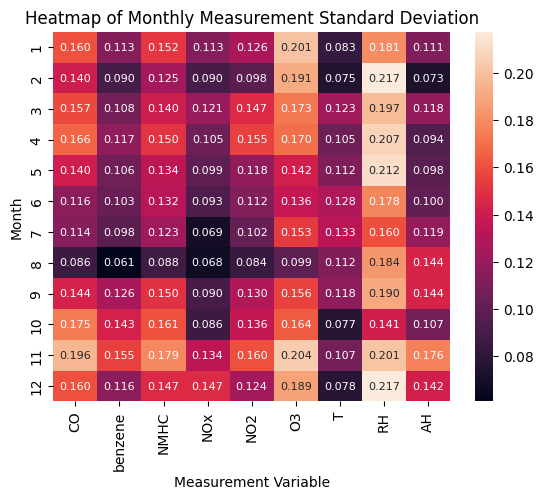

In [49]:
# Create heatmap for monthly standard deviations
df_minmax_month_var = df_minmax.iloc[:,2:-2].groupby(
    df_minmax.DateTime.dt.month).std()
sns.heatmap(df_minmax_month_var, annot=True, fmt=".3f", annot_kws={"size": 8})
plt.ylabel('Month')
plt.xlabel('Measurement Variable')
plt.title('Heatmap of Monthly Measurement Standard Deviation')

Unexpectedly, the plot above shows that the month of August has the lowest variation in chemical concentration values for every analyte. It is unknown why these values are most stable in that month and why the most stable month coincides for the entire set. This month was not the most stable atmospherically (in terms of the weather variables).

When interpreting this heatmap, it is important to note that the color scale automatically adjusted to a different (more narrow) range of values compared to the previous graph of monthly mean values.

##### By Weekday

Next, we will see if there are any trends correlated with the day of the week. We should expect that weekend pollutant concentrations should decrease due to fewer vehicles making a daily commute.

Text(0.5, 1.0, 'Heatmap of Measurement Average Values by Weekday')

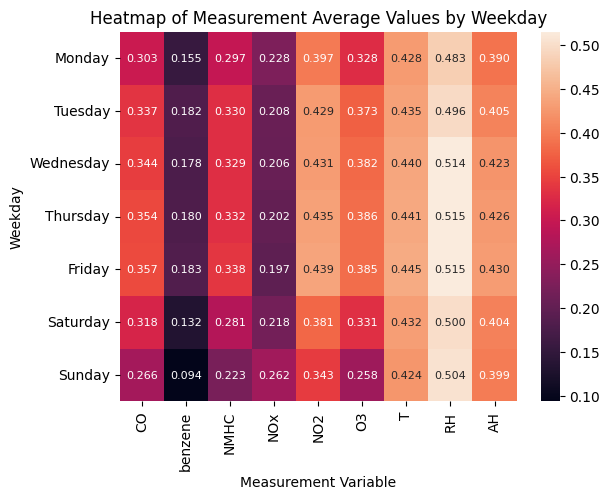

In [50]:
# Create heatmap for mean values grouped by weekday

# Define the desired weekday order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday',
                 'Friday', 'Saturday', 'Sunday']

# Create new DataFrame grouped by weekday
df_minmax_weekday = df_minmax.iloc[:,2:-2].groupby(
    df_minmax.DateTime.dt.strftime('%A')).mean()

# Reindex to sort by the specified weekday order
df_minmax_weekday = df_minmax_weekday.reindex(weekday_order)

sns.heatmap(df_minmax_weekday,
            annot=True, fmt=".3f", annot_kws={"size": 8})
plt.ylabel('Weekday')
plt.xlabel('Measurement Variable')
plt.title('Heatmap of Measurement Average Values by Weekday')

As expected, pollutant concentrations are typically lowest on weekends, with the exception of NOx (which has an inverse trend). The depressed weekend concentrations can be seen to carry over into Monday at anthropogenic pollution builds back up. We can also see a very small weekday dependency for weather variables, although these might not be significant once we consider the standard deviation, which we will do next.

Text(0.5, 1.0, 'Heatmap of Measurement Standard Deviation by Weekday')

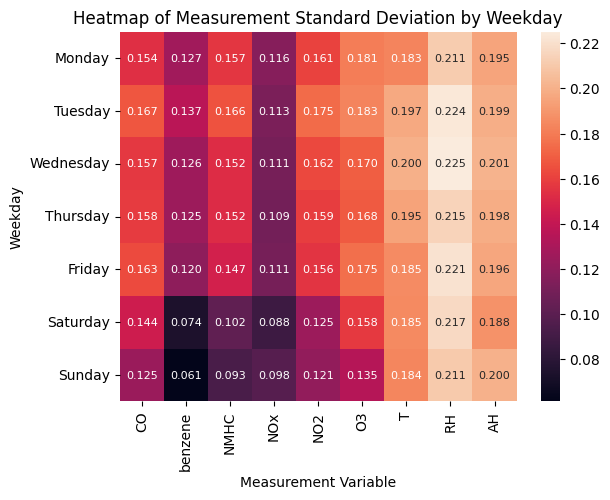

In [51]:
# Create heatmap for standard deviations grouped by weekday
# Define the desired weekday order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday',
                 'Friday', 'Saturday', 'Sunday']

# Create new DataFrame grouped by weekday
df_minmax_weekday_std = df_minmax.iloc[:,2:-2].groupby(
    df_minmax.DateTime.dt.strftime('%A')).std()

# Reindex to sort by the specified weekday order
df_minmax_weekday_std = df_minmax_weekday_std.reindex(weekday_order)

sns.heatmap(df_minmax_weekday_std,
            annot=True, fmt=".3f", annot_kws={"size": 8})
plt.ylabel('Weekday')
plt.xlabel('Measurement Variable')
plt.title('Heatmap of Measurement Standard Deviation by Weekday')

Even though NOx had an inverse trend in the mean concentration by weekday, it follows the trend of the other pollutant concentration in that the weekends have the lowest variability (lowest standard deviation).

Benzene and NOx have the lowest amount of relative standard deviation. Relative Humidity has the highest.

The weather variable standard deviations also show that the previously observed potential weekday dependency is likely not statistically significant; the standard deviation is many times greater than the difference in average values. That means the weather variables are poor candiates for benzene level prediction because they don't follow the same trends (potentially unless a sophisticated model had different calibration parameters based on the day of the week).  

##### By Hour

Lastly, we will evaluate these same numeric summaries when grouping measurements by hour to evaluate trends within the day.

Text(0.5, 1.0, 'Heatmap of Hourly Measurement Average Values')

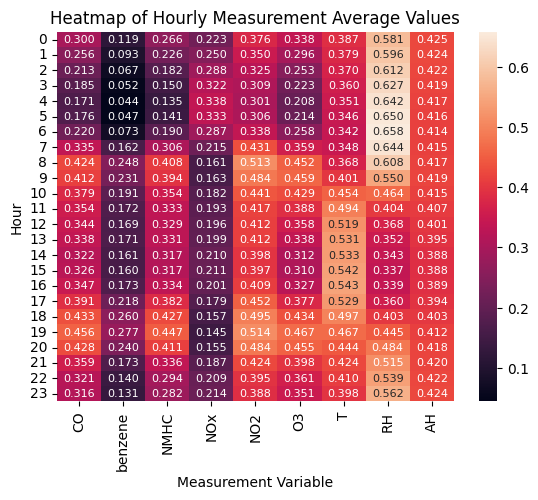

In [52]:
# Create heatmap for hourly mean values
df_minmax_hour = df_minmax.iloc[:,2:-2].groupby(df_minmax.DateTime.dt.hour).mean()
sns.heatmap(df_minmax_hour, annot=True, fmt=".3f", annot_kws={"size": 8})
plt.ylabel('Hour')
plt.xlabel('Measurement Variable')
plt.title('Heatmap of Hourly Measurement Average Values')

This view clearly shows changes in each variable based on the hour of the day. There are two brighter bands (for most variables) around the 8-10 AM period (morning rush hour) and in the evening after work (6-9 PM), likely due to the increase in vehicle traffic around these times. NOx again shows an inverse trend, but with drops at the same times the other pollutant values spike.

Temperature follows a somewhat separate trend based on sun position, while relative humidity again follows an inverse trend with temperature. Absolute humidity stays strikingly steady throughout the day compared to all other variables.

Text(0.5, 1.0, 'Heatmap of Hourly Measurement Standard Deviations')

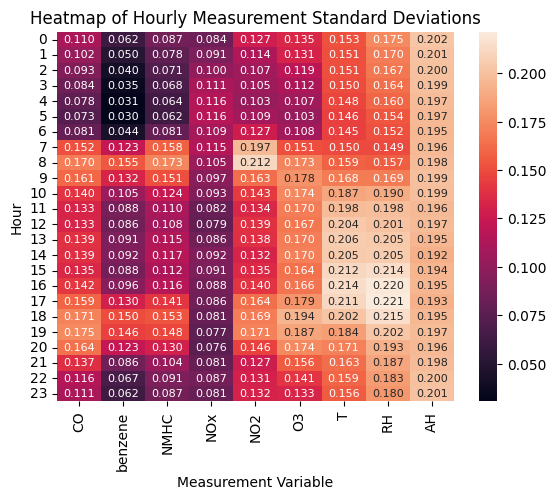

In [53]:
# Create heatmap for hourly standard deviation
df_minmax_hour_std = df_minmax.iloc[:,2:-2].groupby(df_minmax.DateTime.dt.hour).std()
sns.heatmap(df_minmax_hour_std, annot=True, fmt=".3f", annot_kws={"size": 8})
plt.ylabel('Hour')
plt.xlabel('Measurement Variable')
plt.title('Heatmap of Hourly Measurement Standard Deviations')

Along with higher average values during higher vehicle traffic periods, there is a higher standard deviation in these values during the same hours. That means the degree to which pollution increases is different depending on the day, even if the direction/timing of the trend is consistent.

A very unexpected behavior occurs for relative humidity's standard deviation in the late afternoon/early evening. Although the mean value is lowest at this time of day (actually, just a couple hours earlier), the standard deviation is highest. With nearly all of the other variables, the standard deviation is highest when the mean value is highest. It is interesting that the relative humidity fluctuates more during that time of day (relative to the same time on other days). It might be because the temperature standard deviation is highest, so unpredictability in temperature leads to unpredictability in relative humidity (which is a strong function of temperature) even when the absolute value is relatively low.

None of the weather variables have hourly standard deviation trends matching those of benzene, which makes weather variables poor candiates for benzene level prediction.

#### Key Findings

+ **Unprocessed Data:** The dataset originally had 15 columns and 9357 observations in a ucimlrepo.dotdict.dotdict type object.
+ **Cleaned Data:** After converting to a Pandas DataFrame, we dropped four unnecessary "Ground Truth" variables. We also dropped observations with missing values (encoded as -200) in any of the rows, narrowing the dataset to 8991 observations. We also changed column names and created a combined DateTime column for convenience.
+ **Temporal Plots:**
    - _Scaling:_ To see trends of one variable relative to another, it was helpful to apply MinMax scaling to the dataset. Then, each variable was presented on a common, normalized range (0 to 1).
    - _Benzene vs. Weather:_ Temperature and absolute humidity follow the same seasonal trend as each other, but benzene did not follow the same seasonal (or day-to-day) trend as any weather variable.
    - _Benzene vs. Multi-sensor Readings:_ By simplifying the scatter plots to min/max daily value bands, we could more clearly see correlations between benzene and most other multi-sensor readings. Except for NOx, there was a clear correlation between max/min daily concentrations for each pollutant. This showed that there is a strong potential to be able to predict the general trends in benzene max/min daily values from other sensor readings.
    + _Hourly Univariate Plots:_
        + Although benzene, temperature, and relative humidity showed some interesting trends when plotted by hour (ignoring the day), these visual features were limited to the max or min values seen and were not representative of the entire column (as there was a significant amount of spread). None of the weather variables followed benzene's trends (in the extrema, where the visual features occurred).
        + However, one important insight was that benzene levels appear to follow the same trends as we would expect for vehicle traffic density - highest around rush hour and early evening, lowest at night. Weather variables lacked this trend, but other pollutants followed this trend (perhaps with more outliers, as with the case of O3). NOx had an inverse trend to the other hourly pollutant concentrations, potentially due to an environmental feedback mechanism where pollutants scavenge free NOx particles (with the exception of NO2, which follows the normal emissions trends).
+ **Non-Temporal Plots:**
    + _Univariate and Bivariate Distributions:_ The Seaborn `pairplot()` function was used to very quickly generate a set of plots comparing pair-wise distributions of each numeric varible, as well as histograms to show the univariate distributions.
        + _Benzene Distribution:_ Benzene had the least gaussian histogram shape (sharp low-end peak with an exponentially decaying right tail). CO and O3 also have right-tail skewing but are more gaussian than benzene.
        + _Benzene vs. NMHC:_ The bivariate distribution between NMHC and benzene shows an extremely strong correlation. This relationship alone should provide a strong estimate for benzene concentrations.
        + _Benzene vs. Other Pollutants_ Although there is a positive correlation between benzene and CO, O3, and NO2 (and a negative but noticeable correlation with NOx), these pairwise scatter plots have a lot more spread to the data, indicating that they would introduce more error into a benzene prediction.
        + _Benzene vs. Weather:_ Pairwise plots with weather variables did not indicate any significant correlation with benzene levels.
+ **Non-Temporal Numeric Summaries:**
    + _Correlation Matrix:_ A heatmap of the correlation matrix between all numeric variables quickly showed patterns in variable correlation. These numeric values matched the visual trends seen in the pairplots performed previously. NMHC has the highest correlation with benzene, while NOx had an inverse relationship and the other pollutants had lesser but still appreciable correlations to benzene. Weather variables, DateTime, and hour of the day had insignificant correlation with benzene.
    + _Covariance Matrix:_ While similar to the correlation matrix, the covariance matrix uses unscaled data to assess the significance of covariance between variables on an absolute scale. Too low of a covariance is detrimental to predictive power. Here, we saw that benzene's covariance trends did not completely match the correlation trends. For example, NO2 had a higher covariance with benzene than NMHC did (14,977 vs. 10,871), even though NMHC has a far superior correlation value (0.98 vs. 0.77). Therefore, both multi-sensor measurements should be further investigated for benzene predictive performance capability.
    + _Univariate Numeric Summaries:_ Statistical descriptors like min, max, mean, median, quartiles, and standard deviation can all be analyzed individually and in combination, but few, if any, insights are gained that were not more intuitively discovered using time series or univariate (histogram) plots.
+ **Temporal Numeric Summaries:**
    + _By Month:_ When each column's mean values and standard deviations are re-calculated after being grouped by month, you can numerically see some seasonality trends that were shown with temporal plots. Benzene values changed the least throughout the year, while weather variables changed as expected with the seasons.
    + _By Weekday:_ Adding to our evidence of the vehicle traffic-induced pollution increases, we see more pollution over the weekdays and less on the weekends (with NOx, again, being an inverse trend).
    + _By Hour:_ As highlighted in the hourly concentration plots, pollutant levels rise during times of heavy vehicle traffic. This numeric summary confirms the trend we noted visually but were unable to fully confirm due to the wide spread of the hourly data throughout the year. These numeric summaries take all of the data into account to confirm the prior observation.

+ **Overall Conclusions:**
    + The multi-sensor variables are promising potential predictors for benzene.
    + Weather variables appear to be less useful.
    + The hour and weekday may also be correlated, but we should use caution in factoring those into the benzene prediction algorithm because they are an indirect correlation and have no guarantee of future success (e.g., weather events that cause widespread road closures or holidays that change hourly traffic patterns can occur, so the benzene prediction should focus on actual measurements, not just prior trends).  